<a href="https://colab.research.google.com/github/HGuo90s/Fetch_Takehome/blob/main/Take_Home_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fetch Data Analyst Take Home Assessment
This notebook provides entails the codes necessary for the analysis and visualization to the take home assessment. <br> <br>
<a name='contenttable'></a>
Table of Contents <br>
0. [Functions](#functions) <br>
1. [Data Exploration](#dataexplore). <br>
&emsp; Section 1-1. [Data Exploration: User Table](#userdataquality) <br>
&emsp; Section 1-2. [Data Exploration: Products Table](#productsdataquality) <br>
&emsp; Section 1-3. [Data Exploration: Transaction Table](#transactionsdataquality) <br>
&emsp; Section 1-4. [Data Exploration: Entity Relationship](#entityrelationship) <br>
2. [Analytics and Queries](#questionquery). <br>
&emsp; Section 2-1. [Top 5 Brands by Receipts among Adult Users](#top5brandreceipt). <br>
&emsp; Section 2-2. [Top 5 Brands by Sales among Tenured Users](#top5brandsale). <br>
&emsp; Section 2-3. [Fetch Power Users](#fetchpowerusers). <br>
&emsp; Section 2-4. [Dips and Salsa Leading Brand](#leadingbrand). <br>
&emsp; Section 2-5. [Fetch YOY Growth](#yoygrowth). <br>
3. Stakeholder Communication <br>
&emsp; 3-1 Data Quality Issue Summary. <br>
&emsp; 3-2 Data Trends <br>
&emsp; 3-3 Request for Action <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn, scipy, statsmodels
import io, os, csv
import itertools
from google.colab import drive
!pip install -q pandasql
from pandasql import sqldf

  Preparing metadata (setup.py) ... done


In [2]:
# load the data stored on google drive
# mount the drive
drive.mount('/content/drive', force_remount=True)
# file path and file names
file_path = '/content/drive/My Drive/data/Fetchtakehome/'
file_name = ['USER_TAKEHOME', 'PRODUCTS_TAKEHOME',
             'TRANSACTION_TAKEHOME']
# load the files in google colab jupyter notebook
for fname in file_name:
  fpath = os.path.join(file_path, f'{fname}.csv')
  print(fpath)
  try:
    globals()[fname.lower().split('_')[0]] = pd.read_csv(fpath)
    print(f'{fname} loaded successfully!')
  except FileNotFoundError:
    print(f'{fname} not found!')
print('File loading complete.')

Mounted at /content/drive
/content/drive/My Drive/data/Fetchtakehome/USER_TAKEHOME.csv
USER_TAKEHOME loaded successfully!
/content/drive/My Drive/data/Fetchtakehome/PRODUCTS_TAKEHOME.csv
PRODUCTS_TAKEHOME loaded successfully!
/content/drive/My Drive/data/Fetchtakehome/TRANSACTION_TAKEHOME.csv
TRANSACTION_TAKEHOME loaded successfully!
File loading complete.


In [ ]:
# show raw data size
print(f'user rows: {user.shape[0]}, user columns: {user.shape[1]}')
print(f'products rows: {products.shape[0]}, products columns: {products.shape[1]}')
print(f'transaction rows: {transaction.shape[0]}, transaction columns: {transaction.shape[1]}')

user rows: 100000, user columns: 6
products rows: 845552, products columns: 7
transaction rows: 50000, transaction columns: 8


In [ ]:
# quick glance at user data
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [ ]:
# quick glance at products data
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [ ]:
# quick glance at transaction data
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


<a name='functions'></a>
#### 0. Functions

[Back to Table of Contents](#contenttable)

In [3]:
# examine the duplicates, get the duplicates for the entire table
# and the duplicates by the key value
# this function is used to get the number of duplicates for each table
# used in section 1 as a preliminary analysis
def duplicatecheck(df, keyval, df_name):
  return {
      'tbl_name': df_name,
      'tbl_dup_count': df.duplicated().sum(),
      'key_name': keyval,
      'key_dup_count': df[keyval].duplicated().sum()
  }

In [4]:
# get the null value counts for the table by columns
def null_value_count(df):
  df1 = df.isna().sum().reset_index()
  df1.columns = ['column_name', 'null_cnt']
  df1['null_pct'] = ((100*df1['null_cnt']/df.shape[0]).
                     round(2).astype(str).add('%'))
  return df1

In [5]:
# calculate age for users.
def age_calculation(birth_date, target_date):
  return np.floor((target_date-birth_date).days/365.25)

In [6]:
# define function to see unique values in columns
# this function is commonly used to summarized the statistics for
# each unique values in columns
def val_cnt_col(df, col, dropna_cond=False):
  tdf1 = df[col].value_counts(dropna=dropna_cond)
  tdf2 = df[col].value_counts(normalize=True, dropna=dropna_cond)
  tdf = pd.concat([tdf1, tdf2], axis=1).reset_index()
  tdf.columns = col + ['count', 'pct']
  tdf['pct'] = (100*tdf['pct']).round(2).astype(str).add('%')
  return tdf

In [7]:
# this function summarizes the quantity and sale zero conditions
# for each combination of attributes including receipt ID, scan date, etc.
# it is used in transactions table data processing at various steps
def grouped_counts(df):
  d = {}
  d['zero_cnt'] = ((df.final_quantity==0) | (df.final_sale==0)).sum()
  d['all_zero_cnt'] = ((df.final_quantity==0) & (df.final_sale==0)).sum()
  d['all_nonzero_cnt'] = ((df.final_quantity!=0) & (df.final_sale!=0)).sum()
  d['total_cnt'] = df.shape[0]
  return pd.Series(d, index=['zero_cnt', 'all_zero_cnt', 'all_nonzero_cnt',
                             'total_cnt'])

<a name='dataexplore'></a>
#### 1. Data Exploration
&emsp; Section 1-1. [Data Exploration: User Table](#userdataquality) <br>
&emsp; Section 1-2. [Data Exploration: Products Table](#productsdataquality) <br>
&emsp; Section 1-3. [Data Exploration: Transaction Table](#transactionsdataquality) <br>
&emsp; Section 1-4. [Data Exploration: Entity Relationship](#entityrelationship) <br>
<br>
[Back to Table of Contents](#contenttable)

In [8]:
# create copies for further operations
user1 = user.copy()
products1 = products.copy()
transaction1 = transaction.copy()
# convert the column headers to lower case
user1.columns = user1.columns.str.lower()
products1.columns = products1.columns.str.lower()
transaction1.columns = transaction1.columns.str.lower()

In [ ]:
# examine the duplicates, get the duplicates for the entire table
# and the duplicates by the key value
def duplicatecheck(df, keyval, df_name):
  return {
      'tbl_name': df_name,
      'tbl_dup_count': df.duplicated().sum(),
      'key_name': keyval,
      'key_dup_count': df[keyval].duplicated().sum()
  }
tbl_key = {'user1': 'id', 'products1': 'barcode', 'transaction1': 'receipt_id'}
dup_list = []
for df_name, keyval in tbl_key.items():
  df = globals()[df_name]
  dup_list.append(duplicatecheck(df, keyval, df_name))
dup_smry = pd.DataFrame(dup_list)
dup_smry

,tbl_name,tbl_dup_count,key_name,key_dup_count
0,user1,0,id,0
1,products1,215,barcode,4209
2,transaction1,171,receipt_id,25560


In [ ]:
# summarize the null values by columns in user table
# function defined in section 0 functions
null_value_count(user1)

,column_name,null_cnt,null_pct
0,id,0,0.0%
1,created_date,0,0.0%
2,birth_date,3675,3.68%
3,state,4812,4.81%
4,language,30508,30.51%
5,gender,5892,5.89%


In [ ]:
# summarize the null values by columns in products table
# function defined in section 0 functions
null_value_count(products1)

,column_name,null_cnt,null_pct
0,category_1,111,0.01%
1,category_2,1424,0.17%
2,category_3,60566,7.16%
3,category_4,778093,92.02%
4,manufacturer,226474,26.78%
5,brand,226472,26.78%
6,barcode,4025,0.48%


In [ ]:
# summarize the null values by columns in transactions table
# functions defined in section 0 functions
null_value_count(transaction1)

,column_name,null_cnt,null_pct
0,receipt_id,0,0.0%
1,purchase_date,0,0.0%
2,scan_date,0,0.0%
3,store_name,0,0.0%
4,user_id,0,0.0%
5,barcode,5762,11.52%
6,final_quantity,0,0.0%
7,final_sale,0,0.0%


<a name="userdataquality"></a>
Users Table Data Quality <br>
[Back to Table of Contents](#contenttable) <br>
[Back to Data Exploration](#dataexplore) <br>


In [ ]:
# check user duplicates and null values
cnt01 = user1.shape[0]
cnt02 = user1.duplicated().sum()
cnt03 = user1.id.duplicated().sum()
cnt04 = user1.isnull().all(axis=1).sum()
cnt05 = user1.isnull().any(axis=1).sum().sum()
cnt06 = user1.id.isnull().sum()
print(f"""Users table rows: {cnt01}.
Users table duplicates: {cnt02}.
Users table duplicates by ID: {cnt03}.
Users table null value in all columns: {cnt04}.
Users table null value in any column: {cnt05}.
Users table null value in ID column: {cnt06}.""")
# check the null value by columns
dq01 = user1.isnull().sum().reset_index()
dq01.columns = ['column_name', 'null_cnt']
dq01['null_pct'] = (100*dq01['null_cnt']/cnt01).round(2).astype(str).add('%')
dq01

Users table rows: 100000.
Users table duplicates: 0.
Users table duplicates by ID: 0.
Users table null value in all columns: 0.
Users table null value in any column: 34810.
Users table null value in ID column: 0.


,column_name,null_cnt,null_pct
0,id,0,0.0%
1,created_date,0,0.0%
2,birth_date,3675,3.68%
3,state,4812,4.81%
4,language,30508,30.51%
5,gender,5892,5.89%


In [ ]:
user1 = user.copy()
user1.columns = user1.columns.str.lower()

In [9]:
# convert the datetime values in user table
user1['created_date'] = pd.to_datetime(user1['created_date'],
                                       format="%Y-%m-%d %H:%M:%S.%f Z")
user1['birth_date'] = pd.to_datetime(user1['birth_date'],
                                     format="%Y-%m-%d %H:%M:%S.%f Z")

In [10]:
# glance at the user created date
ucc = user1.created_date.dt.year.value_counts()
ucp = user1.created_date.dt.year.value_counts(normalize=True)
uc = pd.concat([ucc, ucp], axis=1).reset_index()
uc.columns = ['year', 'count', 'pct']
uc['pct'] = (100*uc['pct']).round(2).astype(str).add('%')
uc.sort_values(by='year')

,year,count,pct
10,2014,30,0.03%
9,2015,51,0.05%
8,2016,70,0.07%
7,2017,644,0.64%
6,2018,2168,2.17%
5,2019,7093,7.09%
2,2020,16883,16.88%
1,2021,19159,19.16%
0,2022,26807,26.81%
3,2023,15464,15.46%


Birth date min: 1900.0, Birth date max: 2022.0
Age at created date min: -1.0, Age at created date max: 121.0


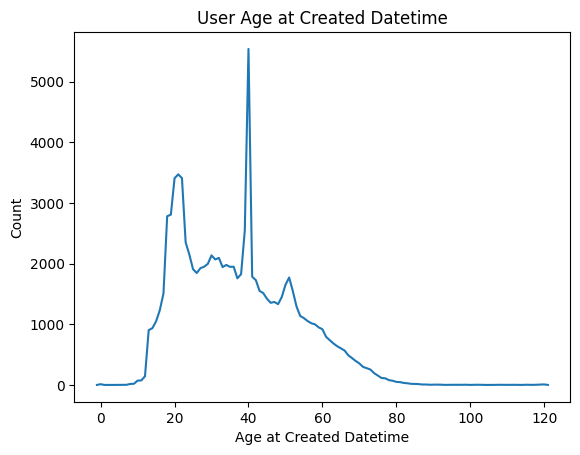

In [ ]:
# analyze the user birth dates
ubmin, ubmax = user1.birth_date.dt.year.min(), user1.birth_date.dt.year.max()
print(f'Birth date min: {ubmin}, Birth date max: {ubmax}')
# calculate age at created date
def age_calculation(birth_date, target_date):
  return np.floor((target_date-birth_date).days/365.25)
user1['age_at_created'] = user1.apply(
    lambda x: age_calculation(x['birth_date'], x['created_date']), axis=1)
print(f"""Age at created date min: {user1.age_at_created.min()}, \
Age at created date max: {user1.age_at_created.max()}""")
# plot the user age bin
plt.plot(user1.age_at_created.value_counts().sort_index())
plt.xlabel('Age at Created Datetime')
plt.ylabel('Count')
plt.title('User Age at Created Datetime')
plt.show()

In [11]:
# set the invalid birth date to null value
cnt021 = user1.birth_date.isnull().sum()
user1.loc[user1.birth_date>user1.created_date, 'birth_date'] = np.nan
cnt022 = user1.birth_date.isnull().sum()
print(f"""user1 birth date null value before this step: {cnt021}.
user1 birth date null value after this step: {cnt022}.
user1 birth date null value increased by: {cnt022-cnt021}.""")

user1 birth date null value before this step: 3675.
user1 birth date null value after this step: 3676.
user1 birth date null value increased by: 1.


In [ ]:
# investigation on state values
unique_states = user1.state.nunique()
print(unique_states)
state_abbr = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY' ]
# find out state not in the 50 us states
for state in user1.state.unique():
  if state not in state_abbr:
    print(f'State not in the 50 U.S.: {state}')
# state DC should be Washington, D.C.
# start PR should be Puerto Rico

52
State not in the 50 U.S.: nan
State not in the 50 U.S.: PR
State not in the 50 U.S.: DC


In [ ]:
# investigate the language values
ucnt = user1.shape[0]
ul1 = user1.language.value_counts(dropna=False)
ul2 = user1.language.value_counts(normalize=True, dropna=False)
uls = pd.concat([ul1, ul2], axis=1).reset_index()
uls.columns = ['language', 'count', 'pct']
uls['pct'] = (100*uls['pct']).round(2).astype(str).add('%')
uls.sort_values(by='language')
# en-419 refers to Spanish in Latin America
# en refer to English

,language,count,pct
0,en,63403,63.4%
2,es-419,6089,6.09%
1,NaN,30508,30.51%


In [ ]:
# investigate gender values
ug1 = user1.gender.value_counts(dropna=False)
ug2 = user1.gender.value_counts(normalize=True, dropna=False)
ugs = pd.concat([ug1, ug2], axis=1).reset_index()
ugs.columns = ['gender', 'count', 'pct']
ugs['pct'] = (100*ugs['pct']).round(2).astype(str).add('%')
ugs.sort_values(by='count', ascending=False)

,gender,count,pct
0,female,64240,64.24%
1,male,25829,25.83%
2,NaN,5892,5.89%
3,transgender,1772,1.77%
4,prefer_not_to_say,1350,1.35%
5,non_binary,473,0.47%
6,unknown,196,0.2%
7,not_listed,180,0.18%
8,Non-Binary,34,0.03%
9,not_specified,28,0.03%


In [12]:
# convert gender to lower case
user1['gender'] = user1.gender.str.lower()
# standardize gender values/value consistency
gender_map = {
    'non-binary': 'non_binary',
    'prefer_not_to_say': 'not_specified',
    'prefer not to say': 'not_specified',
    'unknown': 'not_specified',
    "my gender isn't listed": 'not_listed'
}
# replace gender values to standard values
user1['gender'] = user1.gender.replace(gender_map)
# summarize the new mapping
ug21 = user1.gender.value_counts(dropna=False)
ug22 = user1.gender.value_counts(normalize=True, dropna=False)
ugs2 = pd.concat([ug21, ug22], axis=1).reset_index()
ugs2.columns = ['gender', 'count', 'pct']
ugs2['pct'] = (100*ugs2['pct']).round(2).astype(str).add('%')
ugs2.sort_values(by='count', ascending=False)

,gender,count,pct
0,female,64240,64.24%
1,male,25829,25.83%
2,NaN,5892,5.89%
3,transgender,1772,1.77%
4,not_specified,1575,1.58%
5,non_binary,507,0.51%
6,not_listed,185,0.18%


<a name="productsdataquality"></a>
Products Table Data Quality <br>
[Back to Table of Contents](#contenttable) <br>
[Back to Data Exploration](#dataexplore) <br>


In [ ]:
# examine duplicates in products table
products1[products1.barcode.duplicated(keep=False)].sort_values(
    by=['barcode', 'manufacturer', 'brand']).head()

,category_1,category_2,category_3,category_4,manufacturer,brand,barcode
99568,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,400510.0
349945,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,400510.0
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,404310.0
139121,Snacks,Candy,Chocolate Candy,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,404310.0
274321,Snacks,Crackers,Graham Crackers,NaN,TRADER JOE'S,TRADER JOE'S,438711.0


In [13]:
# barcode Null values counts
cnt11 = products1.shape[0]
cnt12 = products1.barcode.isnull().sum()
cnt13 = products1[products1.barcode.isnull()].duplicated().sum()
cnt14 = products1[~products1.barcode.isnull()].duplicated().sum()
# perserve the dropped duplicate values
prod_dup = products1[products1.duplicated()]
# de-duplicate/drop duplicates with exact same lines
products1.drop_duplicates(inplace=True)
print(f"""Null barcode total: {cnt12}. \
Null barcode duplicates: {cnt13}.
Barcode duplicates without Null value: {cnt14}.
Rows before duplicate removal: {cnt11}.
Rows after duplicate removal: {products1.shape[0]}.
Rows removede in duplicate removal: {cnt11-products1.shape[0]}.""")

Null barcode total: 4025. Null barcode duplicates: 57.
Barcode duplicates without Null value: 158.
Rows before duplicate removal: 845552.
Rows after duplicate removal: 845337.
Rows removede in duplicate removal: 215.


In [14]:
# examine the null values in products table
cnt21 = products1[products1.isnull().all(axis=1)].shape[0]
cnt22 = products1[products1.isnull().any(axis=1)].shape[0]
cnt23 = products1[products1.barcode.isnull()].shape[0]
cnt24 = products1.shape[0]
# drop rows with null barcode
prod_null = products1[products1.barcode.isnull()]
products1.dropna(subset=['barcode'], inplace=True)
cnt25 = products1.shape[0]
# print the summary for this step
print(f"""Null value in all columns: {cnt21}. \
Null value in any column: {cnt22}.
Null value in barcode column: {cnt23}.
Products table before Null removal: {cnt24}.
Products table after Null removal: {cnt25}.
Rows removed in Null removal: {cnt24-cnt25}.""")

Null value in all columns: 0. Null value in any column: 793438.
Null value in barcode column: 3968.
Products table before Null removal: 845337.
Products table after Null removal: 841369.
Rows removed in Null removal: 3968.


In [15]:
# examine different products with the same barcode.
cnt31 = products1.shape[0]
cnt32 = products1[(products1.barcode.duplicated())].shape[0]
print('Different products with same barcode', cnt12)
# perserve only one product per barcode.
prod_dupbar = products1[products1.barcode.duplicated()]
products1.drop_duplicates(subset=['barcode'], keep='first', inplace=True)
cnt33 = products1.shape[0]
print(f"""Different products with same barcode: {cnt32}.
Products table before duplicate removal: {cnt31}.
Products table after duplicate removal: {cnt33}.
Rows removed in duplicate removal: {cnt31-cnt33}.""")

Different products with same barcode 4025
Different products with same barcode: 27.
Products table before duplicate removal: 841369.
Products table after duplicate removal: 841342.
Rows removed in duplicate removal: 27.


In [16]:
# same product details but different barcodes
plist1 = products1.columns.tolist()
plist1.remove('barcode')
pbd_smry = products1.groupby(plist1, dropna=False).agg(
    barcode_unique=('barcode', 'nunique')).reset_index()
print(f"""Number of rows with the same product details but same barcodes:\
{pbd_smry[pbd_smry.barcode_unique>1].shape[0]}.
Total barcodes affected: \
{pbd_smry[pbd_smry.barcode_unique>1].barcode_unique.sum()}""")
pbd_smry.sort_values('barcode_unique', ascending=False).head()

Number of rows with the same product details but same barcodes:27654.
Total barcodes affected: 825842


,category_1,category_2,category_3,category_4,manufacturer,brand,barcode_unique
27712,Snacks,Candy,Confection Candy,NaN,NaN,NaN,17852
26669,Snacks,Candy,Chocolate Candy,NaN,NaN,NaN,14642
17482,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,NaN,NaN,12948
30851,Snacks,Cookies,NaN,NaN,NaN,NaN,10575
13338,Health & Wellness,Medical Supplies & Equipment,NaN,NaN,NaN,NaN,7266


In [17]:
# review some examples that all product details are filled.
pbd_smry_dtls = pbd_smry[~(pbd_smry.isna().any(axis=1))]
print(f"""Number of rows with the same full product details \
but same barcodes: {pbd_smry_dtls.shape[0]}.
Percentage of rows with the same full product details \
but same barcodes: \
{str(100*round((pbd_smry_dtls.shape[0]/pbd_smry.shape[0]),4))} %.
Total barcodes affected: \
{pbd_smry_dtls.barcode_unique.sum()}. """)
pbd_smry_dtls.sort_values(by='barcode_unique', ascending=False).head()

Number of rows with the same full product details but same barcodes: 4776.
Percentage of rows with the same full product details but same barcodes: 11.07 %.
Total barcodes affected: 51897. 


,category_1,category_2,category_3,category_4,manufacturer,brand,barcode_unique
22592,Health & Wellness,Skin Care,Lip Balms & Treatments,Lip Balms,HALEON,CHAPSTICK,962
97,Beverages,Carbonated Soft Drinks,Cola,Regular Cola,PEPSICO,PEPSI,933
22810,Health & Wellness,Skin Care,Lip Balms & Treatments,Lip Balms,THE CLOROX COMPANY,BURT'S BEES BEAUTY,877
94,Beverages,Carbonated Soft Drinks,Cola,Diet Cola,PEPSICO,PEPSI,815
9782,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,BEAUTY BY IMAGINATION,WET BRUSH,741


In [20]:
# create a mapping of barcodes if they correspond to the same product
product_mul_barcodes = pbd_smry[pbd_smry.barcode_unique>1]
# get the list same product details with duplicated barcodes
prod_map = pd.merge(products1, product_mul_barcodes, how='inner', on=plist1)
# get the first barcode by index
prod_map = prod_map.groupby(plist1, dropna=False).agg(
    standardized_barcode=('barcode', 'first')).reset_index()
# get the mapping
prod_map0 = pd.merge(prod_map, products1, on=plist1)
print(prod_map0.shape[0])
prod_map = prod_map0.copy()
prod_map = prod_map[prod_map.standardized_barcode!=prod_map.barcode]
print('barcode mapping table:', prod_map.shape[0])

825842
barcode mapping table: 798188


<a name='transactionsdataquality'></a>
Transaction Table Data Quality <br>
[Back to Table of Contents](#contenttable) <br>
[Back to Data Exploration](#dataexplore) <br>

In [ ]:
transaction1 = transaction.copy()
transaction1.columns = transaction1.columns.str.lower()

In [ ]:
# duplicates
transaction1.head()

,receipt_id,purchase_date,scan_date,store_name,user_id,barcode,final_quantity,final_sale
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [21]:
# duplicates in transactions table
cnt31 = transaction1.shape[0]
cnt32 = transaction1.duplicated().sum()
cnt33 = transaction1.receipt_id.duplicated().sum()
# drop duplicates
transaction1.drop_duplicates(inplace=True)
cnt34 = transaction1.shape[0]
print(f"""Transactions table duplicates: {cnt32}.
Transactions table duplicates by receipt ID: {cnt33}.
Transactions table rows before duplicate removal: {cnt31}.
Transactions table rows after duplicate removal: {cnt34}.
Transactions table rows removed in duplicate removal: {cnt31-cnt34}.""")

Transactions table duplicates: 171.
Transactions table duplicates by receipt ID: 25560.
Transactions table rows before duplicate removal: 50000.
Transactions table rows after duplicate removal: 49829.
Transactions table rows removed in duplicate removal: 171.


In [22]:
# explore quantity values
tq1 = transaction1.final_quantity.value_counts(dropna=False)
tq2 = transaction1.final_quantity.value_counts(normalize=True, dropna=False)
tq = pd.concat([tq1, tq2], axis=1).reset_index()
tq.columns = ['quantity', 'count', 'pct']
tq['pct'] = (100*tq['pct']).round(2).astype(str).add('%')
# show the quantity values that cannot be converted to integer
qnonnum, qnonint = [], []
for q in tq.quantity:
  try:
    if not float(q).is_integer():
      qnonint.append(q)
  except:
    qnonnum.append(q)
print(f"""Quantity values that cannot be converted to float: {qnonnum}.""")
tq[tq.quantity.isin(qnonint)].sort_values(by='count', ascending=False)

Quantity values that cannot be converted to float: ['zero'].


,quantity,count,pct
11,1.40,4,0.01%
13,1.35,4,0.01%
12,0.23,4,0.01%
14,1.47,3,0.01%
15,0.86,3,0.01%
...,...,...,...
59,2.04,1,0.0%
60,3.69,1,0.0%
61,0.70,1,0.0%
62,2.52,1,0.0%


In [ ]:
# explore sales values
ts1 = transaction1.final_sale.value_counts(dropna=False)
ts2 = transaction1.final_sale.value_counts(normalize=True, dropna=False)
ts = pd.concat([ts1, ts2], axis=1).reset_index()
ts.columns = ['sales', 'count', 'pct']
ts['pct'] = (100*ts['pct']).round(2).astype(str).add('%')
# show the sales values that cannot be converted to float
snonnum = []
for s in ts.sales:
  try:
    float(s)
  except:
    snonnum.append(s)
ts[ts.sales.isin(snonnum)]

,sales,count,pct
0,,12486,25.06%


In [23]:
# resolving value type issues in quantity and sales
# summarize the issue in quantity
cnt112 = transaction1.final_quantity.str.startswith('zero', na=False).sum()
# replace "zero" with 0 in quantity
transaction1['final_quantity'] = (transaction1.final_quantity.str.
                                  replace('zero', '0'))
transaction1['final_quantity'] = transaction1.final_quantity.astype(float)
# summarize the issue in sales
cnt113 = transaction1.final_sale.str.startswith(' ', na=False).sum()
cnt1130, cnt1131 = transaction1.duplicated().sum(), transaction1.shape[0]
# replace white space with 0.
transaction1['final_sale'] = transaction1.final_sale.str.strip().replace('', '0')
transaction1['final_sale'] = transaction1.final_sale.astype(float)
# drop duplicated introduced by the replacement in sales.
cnt1132 = transaction1.duplicated().sum()
transaction1.drop_duplicates(inplace=True)
cnt1133 = transaction1.shape[0]
print(f"""Transaction Table number of entries with quantity 'zero': {cnt112}.
Transaction table number of entries with sales ' ': {cnt113}.
Duplicates introduced by replacement in sales: {cnt1132-cnt1130}.
Transaction table before duplicate removal: {cnt1131}.
Transaction table after duplicate removal: {cnt1133}.
""")

Transaction Table number of entries with quantity 'zero': 12491.
Transaction table number of entries with sales ' ': 12486.
Duplicates introduced by replacement in sales: 164.
Transaction table before duplicate removal: 49829.
Transaction table after duplicate removal: 49665.



In [24]:
# step 1.3.4, examine duplicates with zero quantity or sales.
tcols = transaction1.columns.tolist()
tcols.remove('final_quantity')
tcols.remove('final_sale')
transaction1.duplicated(tcols).sum()

24870

In [25]:
# work on removing duplicates, filter entries with duplicated values
# in all columns except quantity and sales
t_dup = transaction1.duplicated(subset=tcols, keep=False)
t_kep = transaction1[~t_dup]
tcnt = transaction1.shape[0]
t_dup_cnt, k_kep_cnt = transaction1[t_dup].shape[0], t_kep.shape[0]
print(f"""Transaction table rows before step 1.3.4.: {tcnt}.
Transaction table rows with duplicated values in tcols: {t_dup_cnt}.
Transaction table rows with unique values in tcols: {k_kep_cnt}.""")

Transaction table rows before step 1.3.4.: 49665.
Transaction table rows with duplicated values in tcols: 49511.
Transaction table rows with unique values in tcols: 154.


In [26]:
# resolving potential data issues on tcols (a set of variables)
# step a. only work on rows with duplicated values
cnt411 = transaction1.shape[0]
transaction1_a = transaction1[t_dup]
cnt412 = transaction1_a.shape[0]
# for each same tcols combination/group, count the number of rows
# with either quantity or sales as zero ("zero_cnt"),
# both zeros ("all_zero_cnt") and total number of rows ("total_cnt")
def grouped_counts(df):
  d = {}
  d['zero_cnt'] = ((df.final_quantity==0) | (df.final_sale==0)).sum()
  d['all_zero_cnt'] = ((df.final_quantity==0) & (df.final_sale==0)).sum()
  d['all_nonzero_cnt'] = ((df.final_quantity!=0) & (df.final_sale!=0)).sum()
  d['total_cnt'] = df.shape[0]
  return pd.Series(d, index=['zero_cnt', 'all_zero_cnt', 'all_nonzero_cnt',
                             'total_cnt'])
grouped = transaction1_a.groupby(by=tcols, dropna=False).apply(
    grouped_counts, include_groups=False).reset_index()
# summarize by zero_cnt and total_cnt
td2cnt1 = grouped[['all_zero_cnt', 'zero_cnt', 'total_cnt']].value_counts()
td2cnt2 = grouped[['all_zero_cnt', 'zero_cnt', 'total_cnt']].value_counts(
    normalize=True)
td2cnt = pd.concat([td2cnt1, td2cnt2], axis=1).reset_index()
td2cnt.columns = ['all_zero_cnt', 'zero_cnt', 'total_cnt', 'count', 'pct']
td2cnt['pct'] = (100*td2cnt['pct']).round(2).astype(str).add('%')
td2cnt.sort_values(by='total_cnt')

,all_zero_cnt,zero_cnt,total_cnt,count,pct
0,0,1,2,24311,98.66%
1,1,2,2,156,0.63%
2,0,2,3,121,0.49%
4,1,2,3,3,0.01%
3,0,2,4,47,0.19%
6,0,2,5,1,0.0%
5,0,3,6,2,0.01%


In [ ]:
# check a random example
rid = np.random.choice(grouped[grouped.total_cnt>3].receipt_id)
transaction1_a[transaction1_a.receipt_id==rid]

,receipt_id,purchase_date,scan_date,store_name,user_id,barcode,final_quantity,final_sale
18226,ba9063e1-f8da-4673-93cf-629905a943a6,2024-07-06,2024-07-08 08:51:25.887 Z,WALMART,5fbb23f4c828d42e52eafb72,4.133104e+10,1.0,0.00
18227,ba9063e1-f8da-4673-93cf-629905a943a6,2024-07-06,2024-07-08 08:51:25.887 Z,WALMART,5fbb23f4c828d42e52eafb72,4.133104e+10,0.0,0.54
43590,ba9063e1-f8da-4673-93cf-629905a943a6,2024-07-06,2024-07-08 08:51:25.887 Z,WALMART,5fbb23f4c828d42e52eafb72,4.133104e+10,1.0,0.54
43591,ba9063e1-f8da-4673-93cf-629905a943a6,2024-07-06,2024-07-08 08:51:25.887 Z,WALMART,5fbb23f4c828d42e52eafb72,4.133104e+10,1.0,0.32


In [ ]:
# check an example where zero_cnt == total_cnt
rid = np.random.choice(grouped[grouped.total_cnt==grouped.zero_cnt].receipt_id)
transaction1_a[transaction1_a.receipt_id==rid]

,receipt_id,purchase_date,scan_date,store_name,user_id,barcode,final_quantity,final_sale
6091,3e32b091-8496-4364-a5f5-9f6c9cae2928,2024-07-24,2024-07-24 11:08:34.179 Z,CVS,5c453e15b244685b6b508dcd,NaN,0.0,0.0
28885,3e32b091-8496-4364-a5f5-9f6c9cae2928,2024-07-24,2024-07-24 11:08:34.179 Z,CVS,5c453e15b244685b6b508dcd,NaN,1.0,0.0


In [27]:
# summarize the null value conditions
null_cnt_t = transaction1_a.isna().sum().reset_index()
null_cnt_t.columns = ['column_name', 'null_cnt']
null_cnt_t['null_pct'] = ((100*null_cnt_t['null_cnt']/cnt412).
                          round(2).astype(str).add('%'))
null_cnt_t

,column_name,null_cnt,null_pct
0,receipt_id,0,0.0%
1,purchase_date,0,0.0%
2,scan_date,0,0.0%
3,store_name,0,0.0%
4,user_id,0,0.0%
5,barcode,5532,11.17%
6,final_quantity,0,0.0%
7,final_sale,0,0.0%


In [28]:
# step b, exception for null values in barcode.
tcols1 = tcols.copy()
tcols1.remove('barcode')
# for the same values in tcols1, how many barcodes/products are usually there
non_null_val = (transaction1_a.groupby(by=tcols1).apply(
    lambda x: x.barcode.nunique(), include_groups=False).reset_index(
        name='barcode_nunique') )
# summarize the unique barcode for same values in tcols1
td3cnt1 = non_null_val['barcode_nunique'].value_counts()
td3cnt2 = non_null_val['barcode_nunique'].value_counts(normalize=True)
td3cnt = pd.concat([td3cnt1, td3cnt2], axis=1).reset_index()
td3cnt.columns = ['barcode_nunique', 'count', 'pct']
td3cnt['pct'] = (100*td3cnt['pct']).round(2).astype(str).add('%')
td3cnt.sort_values(by='barcode_nunique')

,barcode_nunique,count,pct
1,0,2704,11.13%
0,1,21257,87.52%
2,2,316,1.3%
3,3,11,0.05%


In [ ]:
# find a random example
rid = np.random.choice(non_null_val[non_null_val.barcode_nunique>1].receipt_id)
transaction1_a[transaction1_a.receipt_id==rid]
# this example illustrates that for the same receipt that user scanned,
# there could be different products/barcodes on that receipt.
# therefore, all entries are perserved to avoid data loss.

,receipt_id,purchase_date,scan_date,store_name,user_id,barcode,final_quantity,final_sale
18984,c2728ec8-dccf-4562-8b9a-43b723ce6f2b,2024-06-27,2024-06-28 06:56:41.892 Z,WALMART,60a68fda0e83fe39e455d55f,4.240039e+10,1.0,0.00
18985,c2728ec8-dccf-4562-8b9a-43b723ce6f2b,2024-06-27,2024-06-28 06:56:41.892 Z,WALMART,60a68fda0e83fe39e455d55f,7.874204e+10,0.0,1.87
25413,c2728ec8-dccf-4562-8b9a-43b723ce6f2b,2024-06-27,2024-06-28 06:56:41.892 Z,WALMART,60a68fda0e83fe39e455d55f,7.874204e+10,1.0,1.87
39392,c2728ec8-dccf-4562-8b9a-43b723ce6f2b,2024-06-27,2024-06-28 06:56:41.892 Z,WALMART,60a68fda0e83fe39e455d55f,4.240039e+10,1.0,5.48


In [29]:
# step b continued, perserve all records with Null value in barcode.
t_kep_b = transaction1_a[transaction1_a.barcode.isnull()]
transaction1_b = transaction1_a[~transaction1_a.barcode.isnull()]
cnt421, cnt422 = t_kep_b.shape[0], transaction1_b.shape[0]
print(f"""Transaction table before step b: {cnt412}.
Transaction table rows with null value in barcode: {cnt421}.
Transaction table rows with non-null value in barcode: {cnt422}.
""")

Transaction table before step b: 49511.
Transaction table rows with null value in barcode: 5532.
Transaction table rows with non-null value in barcode: 43979.



In [30]:
# step c. drop the rows with zero quantity and zero sales.
# confirm that for all unique tcols combination after step b
# there is always entries/rows that don't have two zeros in
# both quantity and sales
grouped_c = transaction1_b.groupby(by=tcols).apply(
    grouped_counts, include_groups=False).reset_index()
print(f"""Unique combinations of tcols: {grouped_c.shape[0]}.
Combination of tcols with both zero in quantity and sales: \
{grouped_c[grouped_c.all_zero_cnt<grouped_c.total_cnt].shape[0]}.
Combination of tcols with either zero in quantity or sales: \
{grouped_c[grouped_c.all_zero_cnt==grouped_c.total_cnt].shape[0]}.
""")
# drop the rows with both zeros
transaction1_c = transaction1_b.copy()
cond_c = (transaction1_c.final_quantity==0) & (transaction1_c.final_sale==0)
transaction1_c = transaction1_c[~cond_c]
cnt431 =transaction1_c.shape[0]
print(f"""Transaction table before step c: {cnt422}.
Transaction table rows removed in step c: {cnt422-cnt431}.
Transaction table after step c: {cnt431}. """)

Unique combinations of tcols: 21922.
Combination of tcols with both zero in quantity and sales: 21922.
Combination of tcols with either zero in quantity or sales: 0.

Transaction table before step c: 43979.
Transaction table rows removed in step c: 57.
Transaction table after step c: 43922. 


In [31]:
# step d. review the summary
grouped_d = transaction1_c.groupby(by=tcols).apply(
    grouped_counts, include_groups=False).reset_index()
# summarize
td4cnt1 = grouped_d[['zero_cnt', 'total_cnt']].value_counts()
td4cnt2 = grouped_d[[ 'zero_cnt', 'total_cnt']].value_counts(normalize=True)
td4cnt = pd.concat([td4cnt1, td4cnt2], axis=1).reset_index()
td4cnt.columns = ['zero_cnt', 'total_cnt', 'count', 'pct']
td4cnt['pct'] = (100*td4cnt['pct']).round(2).astype(str).add('%')
td4cnt

,zero_cnt,total_cnt,count,pct
0,1,2,21749,99.21%
1,2,3,103,0.47%
2,1,1,56,0.26%
3,2,4,12,0.05%
4,2,5,1,0.0%
5,3,6,1,0.0%


In [32]:
# step d continued. preserve all rows with one entry after the operations
t_kep_d, transaction1_d = transaction1_c.copy(), transaction1_c.copy()
# join with tcols that has only one entry
t_kep_d = pd.merge(
    t_kep_d, grouped_d[grouped_d.total_cnt==1], how='inner', on=tcols)
# only keep the desired columns
t_kep_d = t_kep_d[transaction1_c.columns.tolist()]
# summarize the preserved list to dictionary
tcols_1d_dict = t_kep_d[tcols].to_dict(orient='list')
# create condition
condition1d = ~(transaction1_d[tcols].isin(tcols_1d_dict)).all(axis=1)
# apply the condition
transaction1_d = transaction1_d[condition1d]
# summarized
cnt441, cnt442 = transaction1_d.shape[0], t_kep_d.shape[0]
print(f"""Transaction table before step d: {cnt431}.
Transaction table rows perserved in step d: {cnt442}.
Transction table after step d: {cnt441}.""")

Transaction table before step d: 43922.
Transaction table rows perserved in step d: 56.
Transction table after step d: 43866.


In [33]:
# define function to see unique values in columns
def val_cnt_col(df, col, dropna_cond=False):
  tdf1 = df[col].value_counts(dropna=dropna_cond)
  tdf2 = df[col].value_counts(normalize=True, dropna=dropna_cond)
  tdf = pd.concat([tdf1, tdf2], axis=1).reset_index()
  tdf.columns = col + ['count', 'pct']
  tdf['pct'] = (100*tdf['pct']).round(2).astype(str).add('%')
  return tdf

In [34]:
# step e. review the summary
grouped_e = transaction1_d.groupby(by=tcols).apply(
    grouped_counts, include_groups=False).reset_index()
td5cnt = val_cnt_col(grouped_e, ['zero_cnt', 'total_cnt'])
td5cnt

,zero_cnt,total_cnt,count,pct
0,1,2,21749,99.46%
1,2,3,103,0.47%
2,2,4,12,0.05%
3,2,5,1,0.0%
4,3,6,1,0.0%


In [35]:
# step e continued. drop the rows with one zero in either quantity or sale.
# confirm that for all unique tcols combination after step d
# there is always entries/rows that have non-zeros in both quantity and sale
print(f"""Unique combinations of tcols: {grouped_e.shape[0]}.
Combination of tcols with one zero in either quantity or sale: \
{grouped_e[grouped_e.zero_cnt>0].shape[0]}.
Combination of tcols with at least one non-zero entry \
in both quantity and sale: \
{grouped_e[grouped_e.all_nonzero_cnt>0].shape[0]}. """)
# drop the rows with one zero in either quantity or sale.
transaction1_e = transaction1_d.copy()
cond_e = (transaction1_e.final_quantity==0) | (transaction1_e.final_sale==0)
transaction1_e = transaction1_e[~cond_e]
cnt451 =transaction1_e.shape[0]
print(f"""Transaction table before step e: {cnt441}.
Transaction table rows removed in step e: {cnt441-cnt451}.
Transaction table after step e: {cnt451}. """)

Unique combinations of tcols: 21866.
Combination of tcols with one zero in either quantity or sale: 21866.
Combination of tcols with at least one non-zero entry in both quantity and sale: 21866. 
Transaction table before step e: 43866.
Transaction table rows removed in step e: 21984.
Transaction table after step e: 21882. 


In [36]:
# step f. review the summary
grouped_f = transaction1_e.groupby(by=tcols).apply(
    grouped_counts, include_groups=False).reset_index()
td6cnt = val_cnt_col(grouped_f, ['zero_cnt', 'total_cnt'])
td6cnt

,zero_cnt,total_cnt,count,pct
0,0,1,21852,99.94%
1,0,2,12,0.05%
2,0,3,2,0.01%


In [ ]:
# glance at an example
rid = np.random.choice(grouped_f[grouped_f.total_cnt>1].receipt_id)
transaction1_e[transaction1_e.receipt_id==rid]
# having non-zero values in both quantity and sale, the quantity/sale value
# may be different. this is a rare case based on number. only select the
# last occurrence in the table by index number.

,receipt_id,purchase_date,scan_date,store_name,user_id,barcode,final_quantity,final_sale
42535,34bc2668-b3b6-494a-a6bc-e4a198bda1a0,2024-08-19,2024-08-19 09:58:19.741 Z,BJ'S WHOLESALE CLUB,656339da50f017da4e476bc1,2.004230e+11,1.0,13.17
42561,34bc2668-b3b6-494a-a6bc-e4a198bda1a0,2024-08-19,2024-08-19 09:58:19.741 Z,BJ'S WHOLESALE CLUB,656339da50f017da4e476bc1,2.004230e+11,1.0,12.03


In [37]:
# step f continued. perserve the last occurrence for the same tcols
t_kep_f, transaction1_f = transaction1_e.copy(), transaction1_e.copy()
# join with tcols that has only one entry
t_kep_f = pd.merge(
    t_kep_f, grouped_f[grouped_f.total_cnt==1], how='inner', on=tcols)

t_kep_f = t_kep_f[transaction1_e.columns.tolist()]

transaction1_f = pd.merge(
    transaction1_f, grouped_f[grouped_f.total_cnt==1], how='outer', on=tcols)
transaction1_f = transaction1_f[transaction1_f.total_cnt.isnull()]
transaction1_f = transaction1_f[transaction1_e.columns.tolist()]
# perserve the last occurrence
transaction1_f1 = transaction1_f.groupby(by=tcols, as_index=False).last()
cnt461 = t_kep_f.shape[0]
cnt462, cnt463 = transaction1_f.shape[0], transaction1_f1.shape[0]
print(f"""Transaction table before step f: {cnt451}.
Transaction table rows perserved in step f: {cnt461+cnt463}.
Transction table rows removed: {cnt462-cnt463}.""")

Transaction table before step f: 21882.
Transaction table rows perserved in step f: 21866.
Transction table rows removed: 16.


In [38]:
# join the table together
transaction2 = pd.concat([t_kep, t_kep_b], axis=0)
transaction2 = pd.concat([transaction2, t_kep_d], axis=0)
transaction2 = pd.concat([transaction2, t_kep_f], axis=0)
transaction2 = pd.concat([transaction2, transaction1_f1], axis=0)
print(f"""Transaction Table final: {transaction2.shape[0]}
""")

Transaction Table final: 27608



In [39]:
# convert datetime value
transaction2['scan_date'] = pd.to_datetime(transaction2['scan_date'],
                                           format="%Y-%m-%d %H:%M:%S.%f Z")
transaction2['purchase_date'] = pd.to_datetime(
    transaction2['purchase_date'])

<a name='entityrelationship'></a>
Section 1-4: Data Quality: Entity Relationship <br>
<br>
[Back to Table of Contents](#contenttable) <br>
[Back to Data Exploration](#dataexplore)

In [ ]:
# user id in user table and transaction table
# based on the ER model/diagram, id in user table is VARCHAR.
# convert the id to string.
user1.id.astype(str).str.len().unique()
# strip the string of any white spaces and leading zeros
user1_er_copy = user1.copy()
user1_er_copy['id'] = user1_er_copy['id'].str.strip()
user1_er_copy['id'] = user1_er_copy['id'].str.lstrip('0')
user1_er_copy.id.astype(str).str.len().unique()

array([24])

In [ ]:
# user id in transaction table
transaction2.user_id.astype(str).str.len().unique()
transaction_er_copy = transaction2.copy()
transaction_er_copy['user_id'] = \
transaction_er_copy['user_id'].str.strip()
transaction_er_copy['user_id'] = \
transaction_er_copy['user_id'].str.lstrip('0')
transaction_er_copy.user_id.astype(str).str.len().unique()

array([24])

In [ ]:
# all unique ids in each table
user1_user_id = user1_er_copy.id.unique()
transaction2_user_id = transaction_er_copy.user_id.unique()
# method 1. ids found in both tables
user_id_set = set(user1_user_id)
tcond = transaction_er_copy.user_id.isin(user1_user_id)
t_userid_in_user = transaction_er_copy[tcond].user_id.nunique()
t_userid_notin_user = transaction_er_copy[~tcond].user_id.nunique()
transaction_id_set = set(transaction2_user_id)
ucond = user1_er_copy.id.isin(transaction_id_set)
u_userid_in_transaction = user1_er_copy[ucond].id.nunique()
u_userid_notin_transaction = user1_er_copy[~ucond].id.nunique()
# another way to count ids in both tables by joining table and drop duplicates
id_both_cnt2 = pd.merge(
    user1_er_copy, transaction_er_copy,
    left_on='id', right_on='user_id')['id'].nunique()
print(f"""Method 1:
Number of unique user ids in transction table found in user table: \
{t_userid_in_user} \
({round(100*t_userid_in_user/transaction_er_copy.user_id.nunique(),2)} %).
Not in user table: {t_userid_notin_user}.
Total number of unique user ids in transaction table: \
{transaction_er_copy.user_id.nunique()}.
Number of unique user ids in user table found in transaction table: \
{u_userid_in_transaction} \
({round(100*u_userid_in_transaction/user1_er_copy.id.nunique(),2)} %).
Not in transction table: {u_userid_notin_transaction}.
Total number of unique user ids in user table: \
{user1_er_copy.id.nunique()}.
Method 2:
number of ids found in both tables: {id_both_cnt2}. """)

Method 1: 
Number of unique user ids in transction table found in user table: 91 (0.51 %).
Not in user table: 17603. 
Total number of unique user ids in transaction table: 17694.
Number of unique user ids in user table found in transaction table: 91 (0.09 %).
Not in transction table: 99909.
Total number of unique user ids in user table: 100000.
Method 2: 
number of ids found in both tables: 91. 


In [ ]:
# examine the raw data table instead of the cleaned data
# to make sure there are no information loss during data cleaning.
user_raw = user.copy()
user_raw.columns = user_raw.columns.str.lower()
transaction_raw = transaction.copy()
transaction_raw.columns = transaction_raw.columns.str.lower()
# convert id to string type
user_raw['id'] = user_raw['id'].str.strip()
user_raw['id'] = user_raw['id'].str.lstrip('0')
transaction_raw['user_id'] = transaction_raw['user_id'].str.strip()
transaction_raw['user_id'] = transaction_raw['user_id'].str.lstrip('0')
# find ids in both raw tables.
user_raw_id  = set(user_raw.id.unique())
txn_raw_id = set(transaction_raw.user_id.unique())
uraw_cond = user_raw.id.isin(txn_raw_id)
uraw_userid_in_txn = user_raw[uraw_cond].id.nunique()
uraw_userid_notin_txn = user_raw[~uraw_cond].id.nunique()
traw_cond = transaction_raw.user_id.isin(user_raw_id)
traw_userid_in_user = transaction_raw[traw_cond].user_id.nunique()
traw_userid_notin_user = transaction_raw[~traw_cond].user_id.nunique()
print(f"""Unique user ids from user table found in transaction table: \
{uraw_userid_in_txn}. \
({round(100*uraw_userid_in_txn/user_raw.id.nunique(),2)} %).
Unique user ids not found in transaction table: \
{uraw_userid_notin_txn}.
Unique user ids from transaction table found in user table: \
{traw_userid_in_user}. \
({round(100*traw_userid_in_user/transaction_raw.user_id.nunique(),2)} %).
Unique user ids not found in user table: \
{traw_userid_notin_user}.
""")

Unique user ids from user table found in transaction table: 91. (0.09 %).
Unique user ids not found in transaction table: 99909.
Unique user ids from transaction table found in user table: 91. (0.51 %).
Unique user ids not found in user table: 17603.



In [ ]:
# analyze the barcode in products table
p_barcodes = products1.barcode.astype(int)
p_barcode_unique = p_barcodes.nunique()
p_barcode_min = p_barcodes.min()
p_barcode_max = p_barcodes.max()
products_raw = products.copy()
products_raw.columns = products_raw.columns.str.lower()
p_barcodes_raw = products_raw[
    ~(products_raw.barcode.isna())].barcode.astype(int)
p_barcodes_na_raw = products_raw[products_raw.barcode.isna()].shape[0]
p_barcode_unique_raw = p_barcodes_raw.nunique()
p_barcode_min_raw = p_barcodes_raw.min()
p_barcode_max_raw = p_barcodes_raw.max()
t_barcodes = transaction2[
    ~(transaction2.barcode.isna())].barcode.astype(int)
t_barcodes_na = transaction2[transaction2.barcode.isna()].shape[0]
t_barcode_unique = t_barcodes.nunique()
t_barcode_min = t_barcodes.min()
t_barcode_max = t_barcodes.max()
t_barcodes_raw = transaction_raw[
    ~(transaction_raw.barcode.isna())].barcode.astype(int)
t_barcodes_na_raw = transaction_raw[transaction_raw.barcode.isna()].shape[0]
t_barcode_unique_raw = t_barcodes_raw.nunique()
t_barcode_min_raw = t_barcodes_raw.min()
t_barcode_max_raw = t_barcodes_raw.max()
print(f"""Number of unique barcodes in products table: {p_barcode_unique}.
Min barcode: {p_barcode_min}.
Max barcode: {p_barcode_max}.
Number of unique barcodes in raw products table: {p_barcode_unique_raw}.
Number of null barcodes in raw products table: {p_barcodes_na_raw}.\
Percentage: {round(100*p_barcodes_na_raw/products1.shape[0],2)}%.

Number of unique barcodes in transactions table: {t_barcode_unique}.
Number of null barcodes in transactions table: {t_barcodes_na}.\
Percentage: {round(100*t_barcodes_na/transaction2.shape[0],2)}%
Min barcode in transaction table: {t_barcode_min}.
Max barcode in transaction table: {t_barcode_max}.
Number of unique barcodes in raw transactions table: {t_barcode_unique_raw}.
Number of null barcodes in raw transactions table: {t_barcodes_na_raw}.\
Percentage: {round(100*t_barcodes_na_raw/transaction_raw.shape[0],2)}%.
Min barcode in raw transaction table: {t_barcode_min_raw}.
Max barcode in raw transaction table: {t_barcode_max_raw}.
""")

Number of unique barcodes in products table: 841342.
Min barcode: 185.
Max barcode: 62911081607944. 
Number of unique barcodes in raw products table: 841342.
Number of null barcodes in raw products table: 4025.Percentage: 0.48%.

Number of unique barcodes in transactions table: 11027.
Number of null barcodes in transactions table: 5629.Percentage: 20.39%
Min barcode in transaction table: -1.
Max barcode in transaction table: 9347108002132.
Number of unique barcodes in raw transactions table: 11027.
Number of null barcodes in raw transactions table: 5762.Percentage: 11.52%.
Min barcode in raw transaction table: -1.
Max barcode in raw transaction table: 9347108002132.



In [ ]:
# after removing the duplicates
products_raw.drop_duplicates()[products_raw.barcode.isna()].shape[0]

<ipython-input-350-bf9bf6fe33c8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  products_raw.drop_duplicates()[products_raw.barcode.isna()].shape[0]


3968

In [ ]:
# barcodes in transactions table found in products table.
transaction2_barcode = set(transaction2.barcode.unique())
products_barcode = set(products1.barcode.unique())
tb_cond = transaction_raw.barcode.isin(products_raw.barcode)
tb_barcode_in_products = transaction_raw[tb_cond].barcode.nunique()
tb_barcode_notin_products = transaction_raw[~tb_cond].barcode.nunique()
pb_cond = products_raw.barcode.isin(transaction_raw.barcode)
pb_barcode_in_transaction = products_raw[pb_cond].barcode.nunique()
pb_barcode_notin_transaction = products_raw[~pb_cond].barcode.nunique()
print(f"""Number of barcodes in transaction table found in products table: \
{tb_barcode_in_products}. Percentage: \
{round(100*tb_barcode_in_products/t_barcode_unique_raw,2)}%.
Number of barcodes in transaction table not found in products table: \
{tb_barcode_notin_products}.
Number of barcodes in products table found in transaction table: \
{pb_barcode_in_transaction}. Percentage: \
{round(100*pb_barcode_in_transaction/p_barcode_unique_raw,2)}%.
Number of barcodes in products table not found in transaction table: \
{pb_barcode_notin_transaction}.
""")

Number of barcodes in transaction table found in products table: 6562. Percentage: 59.51%.
Number of barcodes in transaction table not found in products table: 4465.
Number of barcodes in products table found in transaction table: 6562. Percentage: 0.78%.
Number of barcodes in products table not found in transaction table: 834780.



In [62]:
# investigaet the products with same details but different barcodes
plist1 = products1.columns.tolist()
plist1.remove('barcode')
# for each product detail combination, get the number of barcode associated
# with it
pbd_smry = products1.groupby(plist1, dropna=False).agg(
    barcode_unique=('barcode', 'nunique')).reset_index()
# filter for barcodes correspond to the same product details
prod_dtls = pbd_smry[pbd_smry.barcode_unique>1]
# get the list of barcodes associated with the product details
prod_map = pd.merge(
    products1, product_mul_barcodes, how='inner', on=plist1)
# based on the transaction table, introduce store name
valid_txn = transaction2[
    ~(transaction2.barcode.isna()) &
    (transaction2.final_quantity>0) & (transaction2.final_sale>0)]
# get the unique combinations of barcodes and store names from
# transactions table
valid_txn_barstore = valid_txn[['barcode', 'store_name']].drop_duplicates()
# join with prod_map to get store names for each barcodes
prod_map_store = pd.merge(
    prod_map, valid_txn_barstore, how='left', on='barcode')
# identify the new combination of product details, including store names
plist2 = plist1.copy()
plist2.append('store_name')
new_combination = prod_map_store.groupby(plist2, dropna=False).agg(
    barcode_unique=('barcode', 'nunique')).reset_index()
# filter for same product details (store name) that have multiple barcodes
prod_dtls_new = new_combination[new_combination.barcode_unique>1]
# get the barcodes that correspond to the same product details.
prod_map_new = pd.merge(
    prod_map_store, prod_dtls_new, how='inner', on=plist2)
print(f"""Product detail combinations (1+ barcodes): {prod_dtls.shape[0]}.
Barcodes associated with those combinations: {prod_map.shape[0]}.
Barcodes with store name after join: \
{prod_map_store[~(prod_map_store.store_name.isna())].shape[0]}.
New product detail combinations (1+ barcodes): \
{prod_dtls_new.shape[0]}.
Barcodes associated with those new combinations: \
{prod_map_new.shape[0]}.
""")

Product detail combinations (1+ barcodes): 27654.
Barcodes associated with those combinations: 825842.
Barcodes with store name after join: 8655.
New product detail combinations (1+ barcodes): 28772.
Barcodes associated with those new combinations: 823585.



In [72]:
barcodes_with_store_cnt

8655

In [84]:
# among the barcodes with store name after join, how many store
# combinations does each unique plist1 have?
plist_brand_cnt = prod_map_store[~(prod_map_store.store_name.isna())].groupby(
    by=plist1, dropna=False).agg(
        store_unique=('store_name', 'nunique')).reset_index()
# calculate the list of barcodes with store name after join
barcodes_with_store_cnt = \
prod_map_store[~(prod_map_store.store_name.isna())]
# unique number of plist combinations for those barcodes
plist_comb_store = barcodes_with_store_cnt[plist1].drop_duplicates()
# get the unique store range
print(f"""New combination with store name: {plist_brand_cnt.shape[0]}
Store unique range: {plist_brand_cnt.store_unique.min()} - \
{plist_brand_cnt.store_unique.max()}.""")
plist_brand_cnt_bins = {
    '1': [plist_brand_cnt[plist_brand_cnt['store_unique']==1].shape[0]],
    '2-5': [plist_brand_cnt[
        (plist_brand_cnt['store_unique']>=2) &
        (plist_brand_cnt['store_unique']<=5)].shape[0]],
    '5-10': [plist_brand_cnt[
        (plist_brand_cnt['store_unique']>=5) &
        (plist_brand_cnt['store_unique']<=10)].shape[0]],
    '>10': [plist_brand_cnt[
        plist_brand_cnt['store_unique']>10].shape[0]]
}
plist_brand_cnt_bins = pd.DataFrame(plist_brand_cnt_bins)
#plist_brand_cnt_bins.index = ['1', '2-5', '5-10', '>10']
plist_brand_cnt_bins = plist_brand_cnt_bins.T
plist_brand_cnt_bins.columns = ['plist1_combination_cnt']
plist_brand_cnt_bins['pct'] = \
(100*plist_brand_cnt_bins['plist1_combination_cnt']/
 plist_brand_cnt.shape[0]).round(2).astype(str).add('%')
plist_brand_cnt_bins

New combination with store name: 2008
Store unique range: 1 - 112.


,plist1_combination_cnt,pct
1,1227,61.11%
2-5,572,28.49%
5-10,181,9.01%
>10,79,3.93%


<a name='questionquery'></a>
Analytics and Queries <br>
This section lists the codes to all the questions. <br>
&emsp; Section 2-1. [Top 5 Brands by Receipts among Adult Users](#top5brandreceipt). <br>
&emsp; Section 2-2. [Top 5 Brands by Sales among Tenured Users](#top5brandsale). <br>
&emsp; Section 2-3. [Fetch Power Users](#fetchpowerusers). <br>
&emsp; Section 2-4. [Dips and Salsa Leading Brand](#leadingbrand). <br>
&emsp; Section 2-5. [Fetch YOY Growth](#yoygrowth). <br>
<br>
[Back to Table of Contents](#contenttable) <br>

<a name='top5brandreceipt'></a>
Section 2-1. Top 5 Brands by Receipts <br>
Query 2.1.1 SQL Query for Top 5 Brands by Receipt
for Users Aged 21 and Above. <br>
Query 2.1.2 SQL Query for Top 5 Brands by Receipt
for All Users.<br>
<br>
[Back to Table of Contents](#contenttable) <br>
[Back to Analytics and Queries](#questionquery)

In [ ]:
# query 2.1.1, top 5 brands by receipts for users aged 21 and above.
query11 = """
SELECT P.BRAND
FROM (SELECT * FROM transaction2
WHERE BARCODE IS NOT NULL AND USER_ID IS NOT NULL
AND FINAL_QUANTITY>0 AND FINAL_SALE>0) T
JOIN (SELECT * FROM products1
WHERE BARCODE IS NOT NULL AND BRAND IS NOT NULL) P
ON T.BARCODE=P.BARCODE
JOIN (SELECT * FROM user1
WHERE BIRTH_DATE IS NOT NULL) u
ON T.USER_ID=u.ID
WHERE FLOOR(JULIANDAY(T.SCAN_DATE)-JULIANDAY(U.BIRTH_DATE)/365.25)>=21
GROUP BY 1 ORDER BY COUNT(DISTINCT T.RECEIPT_ID) DESC,
SUM(FINAL_SALE) DESC, SUM(FINAL_QUANTITY) DESC LIMIT 5
"""
result = sqldf(query11, globals())
print(result)

         brand
0         DOVE
1  NERDS CANDY
2      TRIDENT
3  GREAT VALUE
4       MEIJER


In [ ]:
# query 2.1.1, top 5 brands by receipts for users aged 21 and above.
query12 = """
SELECT P.BRAND
FROM (SELECT * FROM transaction2
WHERE BARCODE IS NOT NULL AND USER_ID IS NOT NULL
AND FINAL_QUANTITY>0 AND FINAL_SALE>0) T
JOIN (SELECT * FROM products1
WHERE BARCODE IS NOT NULL AND BRAND IS NOT NULL) P
ON T.BARCODE=P.BARCODE
GROUP BY 1 ORDER BY COUNT(DISTINCT T.RECEIPT_ID) DESC,
SUM(FINAL_SALE) DESC, SUM(FINAL_QUANTITY) DESC LIMIT 5
"""
result = sqldf(query12, globals())
print(result)

         brand
0    COCA-COLA
1  GREAT VALUE
2        PEPSI
3       EQUATE
4        LAY'S


<a name='top5brandsale'></a>
Section 2.2 Top 5 Brands by Sales <br>
<br>
[Back to Table of Contents](#contenttable) <br>
[Back to Analytics and Queries](#questionquery)

In [ ]:
# query 2.2.1, top 5 brands by receipts for users aged 21 and above.
query21 = """
SELECT P.BRAND
FROM (SELECT * FROM transaction2
WHERE BARCODE IS NOT NULL AND USER_ID IS NOT NULL
AND FINAL_QUANTITY>0 AND FINAL_SALE>0) T
JOIN (SELECT * FROM products1
WHERE BARCODE IS NOT NULL AND BRAND IS NOT NULL) P
ON T.BARCODE=P.BARCODE
JOIN (SELECT * FROM user1
WHERE BIRTH_DATE IS NOT NULL) u
ON T.USER_ID=u.ID
WHERE
(12*STRFTIME('%Y', T.SCAN_DATE)-STRFTIME('%Y', U.CREATED_DATE)) +
(STRFTIME('%m', T.SCAN_DATE)-STRFTIME('%m', U.CREATED_DATE)) >= 6
GROUP BY 1 ORDER BY SUM(FINAL_SALE) DESC, SUM(FINAL_QUANTITY) DESC LIMIT 5
"""
result = sqldf(query21, globals())
print(result)

         brand
0          CVS
1         DOVE
2      TRIDENT
3  COORS LIGHT
4     TRESEMMÉ


<a name='fetchpowerusers'></a>
Section 2.3 Fetch Power Users <br>
&emsp; Pre-analysis. <br>
&emsp; Query. <br>
<br>
[Back to Table of Contents](#contenttable) <br>
[Back to Section 2. Analytics and Queries](#questionquery)

In [87]:
def val_cnt_col(df, col, dropna_cond=False):
  tdf1 = df[col].value_counts(dropna=dropna_cond)
  tdf2 = df[col].value_counts(normalize=True, dropna=dropna_cond)
  tdf = pd.concat([tdf1, tdf2], axis=1).reset_index()
  tdf.columns = col + ['count', 'pct']
  tdf['pct'] = (100*tdf['pct']).round(2).astype(str).add('%')
  return tdf

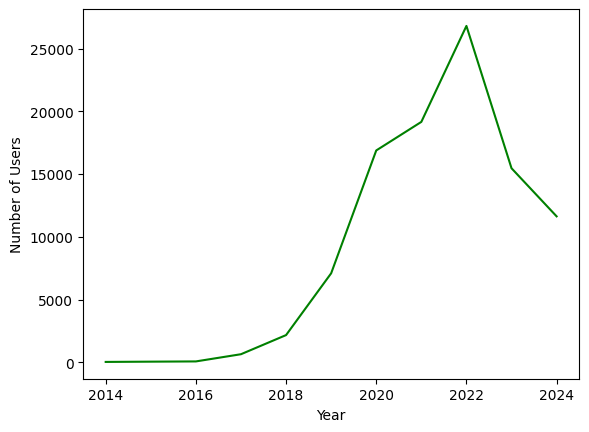

In [88]:
# user created dates by year and visualization
user1_copy = user1.copy()
user1_copy['created_year'] = user1_copy['created_date'].dt.year
user1_year_cnt = val_cnt_col(user1_copy, ['created_year'])
user1_year_cnt.sort_values(by='created_year', inplace=True)
plt.plot(user1_year_cnt['created_year'], user1_year_cnt['count'], color='g')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.show()

In [89]:
# frequency metric analysis
# summarize the number of receipts scanned by users
transaction2_copy = transaction2.copy()
user_receipt_cnt = transaction2_copy.groupby(by='user_id', dropna=False).agg(
    receipt_unique=('receipt_id', 'nunique')).reset_index()
user_receipt_cnt.sort_values(by='receipt_unique', ascending=False,
                             inplace=True)
# get the mean, median and 75th percentile of unique receipt counts
print(f"""Median number of unique receipts per user: \
{user_receipt_cnt.receipt_unique.median()}.
75th percentile: {user_receipt_cnt.receipt_unique.quantile(0.75)}.
average: {user_receipt_cnt.receipt_unique.mean()}""")

Median number of unique receipts per user: 1.0.
75th percentile: 2.0.
average: 1.3812591839041484


the scanned year of all transactions: [2024].
First scan date: 2024-06-12 06:36:34.910000.
Last scan date: 2024-09-08 23:07:19.836000.
Week number range: 24 - 36. 


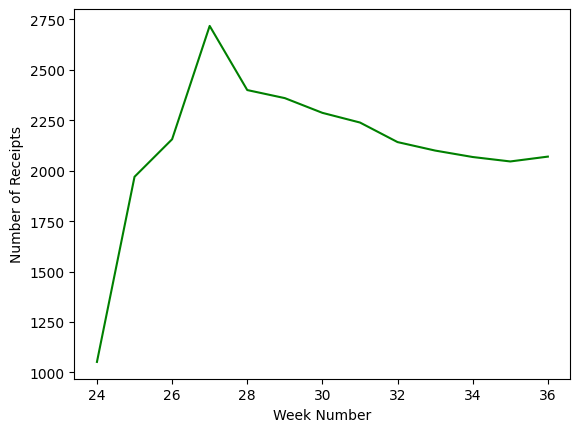

In [90]:
# create a week column and a month column
transaction2_copy = transaction2.copy()
transaction2_copy['scan_week'] = \
transaction2_copy['scan_date'].dt.isocalendar().week
# frequency, the number of receipts scanned per week
print(f"""the scanned year of all transactions: \
{transaction2.scan_date.dt.year.unique()}.
First scan date: {transaction2.scan_date.min()}.
Last scan date: {transaction2.scan_date.max()}.
Week number range: {transaction2_copy.scan_week.min()} - \
{transaction2_copy.scan_week.max()}. """)
# create a week column
transaction2_copy['scan_week'] = \
transaction2_copy['scan_date'].dt.isocalendar().week
# summarize by the week number
transaction2_week_cnt = val_cnt_col(transaction2_copy, ['scan_week'])
# visualize by week number
transaction2_week_cnt.sort_values(by='scan_week', inplace=True)
plt.plot(transaction2_week_cnt['scan_week'],
         transaction2_week_cnt['count'], color='g')
plt.xlabel('Week Number')
plt.ylabel('Number of Receipts')
plt.show()

In [91]:
# consistency metrics analysis
# summarize the number of receipt scanned by users each week
user_scan_wkly_smry = transaction2_copy.groupby(
    by=['user_id', 'scan_week']).agg(
    receipt_unique=('receipt_id', 'nunique')).reset_index()
# get the unique values of users and scan weeks
t_users_list = transaction2_copy.user_id.unique()
t_sweek_list = transaction2_copy.scan_week.unique()
# get the combinations of users and scan weeks
user_week_comb = list(itertools.product(t_users_list, t_sweek_list))
user_week_comb_df = pd.DataFrame(user_week_comb,
                                 columns=['user_id', 'scan_week'])
# combine the combination with the actual numbers
user_scan_wkly_smry_cnt = pd.merge(
    user_scan_wkly_smry, user_week_comb_df, how='right',
    on=['user_id', 'scan_week'])
user_scan_wkly_smry_cnt.fillna(0, inplace=True)
user_scan_wkly_smry_cnt.receipt_unique = (
    user_scan_wkly_smry_cnt.receipt_unique.astype(int) )
# average number of unique receipts per week for each users
user_scan_wkly_avg = user_scan_wkly_smry_cnt.groupby(by='user_id').agg(
    avg_receipt=('receipt_unique', 'mean')).reset_index()
# for each user ID, get the number of weeks they have at least one unique
# receipt
user_scan_wkly_1rec_cnt = user_scan_wkly_smry_cnt.groupby(by='user_id').agg(
    week_cnt_one_receipt=('receipt_unique', lambda x: (x>0).sum())
    ).reset_index()
print(f"""Total number of weeks in transaction table: \
{transaction2_copy.scan_week.nunique()}.
Total number of unique users: {transaction2_copy.user_id.nunique()}.
Maximum number of weeks a user has at least one unique receipt: \
{user_scan_wkly_1rec_cnt.week_cnt_one_receipt.max()}.
Medium number of weeks a user has at least one unique receipt: \
{user_scan_wkly_1rec_cnt.week_cnt_one_receipt.median()}.
75th percentile of weeks a user has at least one unique receipt: \
{user_scan_wkly_1rec_cnt.week_cnt_one_receipt.quantile(0.75)}.
Average number of weeks a user has at least one unique receipt: \
{user_scan_wkly_1rec_cnt.week_cnt_one_receipt.mean().round(2)}.
""")


Total number of weeks in transaction table: 13.
Total number of unique users: 17694.
Maximum number of weeks a user has at least one unique receipt: 6.
Medium number of weeks a user has at least one unique receipt: 1.0.
75th percentile of weeks a user has at least one unique receipt: 2.0.
Average number of weeks a user has at least one unique receipt: 1.34.



In [ ]:
# recency metric analysis
recent_user_num, existing = [35, 34, 33, 32], [36]
ttl_users = transaction2_copy.user_id.nunique()
user_scan_wkly_smry_cnt = \
user_scan_wkly_smry_cnt[user_scan_wkly_smry_cnt.receipt_unique>0]
cond = (user_scan_wkly_smry_cnt.scan_week==36)
for num in recent_user_num:
  r_users = user_scan_wkly_smry_cnt[cond].user_id.nunique()
  print(f"""Users with 1+ receipt in any of \
  these week {existing}: {r_users}. \
  {round(100*r_users/ttl_users, 2)} % of all users.""")
  cond = cond | (user_scan_wkly_smry_cnt.scan_week==num)
  existing.append(num)

Users with 1+ receipt in any of   these week [36]: 1856.   10.49 % of all users.
Users with 1+ receipt in any of   these week [36, 35]: 3583.   20.25 % of all users.
Users with 1+ receipt in any of   these week [36, 35, 34]: 5223.   29.52 % of all users.
Users with 1+ receipt in any of   these week [36, 35, 34, 33]: 6766.   38.24 % of all users.


In [ ]:
# quantity and sale metrics analysis
quantity_sale_cnt = transaction2_copy.groupby(by='user_id', dropna=False).agg(
    quantity_sum=('final_quantity', 'sum'),
    sale_sum=('final_sale', 'sum'), ).reset_index()
# get the median and 75 percentile of quantity sum and sale sum
print(f"""Median of quantity sum: {quantity_sale_cnt.quantity_sum.median()}.
75th percentile of quantity sum: \
{quantity_sale_cnt.quantity_sum.quantile(0.75)}.
Median of sale sum: {quantity_sale_cnt.sale_sum.median()}.
75th percentile of sale sum: \
{quantity_sale_cnt.sale_sum.quantile(0.75)}.""")

Median of quantity sum: 1.0.
75th percentile of quantity sum: 2.0.
Median of sale sum: 4.390000000000001.
75th percentile of sale sum: 8.0175.


In [ ]:
# reliance and exploration metrics analysis
t_purchase = transaction2_copy[
    (transaction2_copy.final_quantity>0) & (transaction2_copy.final_sale>0) ]
tp_copy = pd.merge(t_purchase, products1, how='inner', on='barcode')
user_brand = tp_copy.groupby(by=['user_id', 'brand'], dropna=False).agg(
    purchase_cnt=('receipt_id', 'nunique')).reset_index()
# get the median and 75 percentile of purchase cnt on same brand
print(f"""Median of purchase cnt on same brand: \
{user_brand.purchase_cnt.median()}.
75th percentile of purchase cnt on same brand: \
{user_brand.purchase_cnt.quantile(0.75)}.""")
# percentage of users with more than one purchase
user_brand_cnt = val_cnt_col(user_brand, ['purchase_cnt'])
user_brand_cnt

Median of purchase cnt on same brand: 1.0.
75th percentile of purchase cnt on same brand: 1.0.


,purchase_cnt,count,pct
0,1,12018,99.01%
1,2,115,0.95%
2,3,5,0.04%


In [ ]:
# brand exploration
user_explore = tp_copy.groupby(by='user_id', dropna=False).agg(
    brand_unique=('brand', 'nunique'),
    category_unique=('category_1', 'nunique')).reset_index()
# get the median and 75th percentile of brand and category
print(f"""Median of brand unique: {user_explore.brand_unique.median()}.
75th percentile of brand unique: \
{user_explore.brand_unique.quantile(0.75)}.
Median of category unique: {user_explore.category_unique.median()}.
75th percentile of category unique: \
{user_explore.category_unique.quantile(0.75)}.""")

Median of brand unique: 1.0.
75th percentile of brand unique: 1.0.
Median of category unique: 1.0.
75th percentile of category unique: 1.0.


In [ ]:
# get the percentage of users with more than one brand purchased
val_cnt_col(user_explore, ['brand_unique'])

,brand_unique,count,pct
0,1,8341,82.1%
1,2,1349,13.28%
2,0,240,2.36%
3,3,192,1.89%
4,4,32,0.31%
5,5,5,0.05%
6,6,1,0.01%


In [ ]:
# get the percentage of users with more than one category purchased
val_cnt_col(user_explore, ['category_unique'])

,category_unique,count,pct
0,1,9062,89.19%
1,2,828,8.15%
2,0,246,2.42%
3,3,24,0.24%


In [ ]:
# selection of users
user_smry_tbl = transaction2_copy.groupby(by='user_id', dropna=False).agg(
    receipt_unique=('receipt_id', 'nunique')).reset_index()
# satisfy frequency
user_smry_tbl = user_smry_tbl[user_smry_tbl.receipt_unique>=2]
print(f'frequency condition: {user_smry_tbl.user_id.nunique()}')

# satisfy quantity
t2_valid = transaction2_copy[
    (transaction2_copy.final_quantity>0) &
    (transaction2_copy.final_sale>0) &
    ~(transaction2_copy.barcode.isna())]
user_smry_tbl_valid = t2_valid.groupby(by='user_id', dropna=False).agg(
    quantity_sum=('final_quantity', 'sum'),
    sale_sum=('final_sale', 'sum')).reset_index()
user_quantity = user_smry_tbl_valid[user_smry_tbl_valid.quantity_sum>=2]
user_smry_tbl = pd.merge(user_smry_tbl, user_quantity, how='inner',
                         on='user_id')
print(f'quantity condition: {user_smry_tbl.user_id.nunique()}')
# satisfy sales
user_sale = user_smry_tbl_valid[user_smry_tbl_valid.sale_sum>=8]
user_smry_tbl = pd.merge(user_smry_tbl, user_sale, how='inner',
                         on='user_id')
print(f'sales condition: {user_smry_tbl.user_id.nunique()}')
# satisfy consistency
user_scan_wkly_pos = user_scan_wkly_smry_cnt.groupby(by='user_id').agg(
    wk_with_pos_receipt=('receipt_unique', lambda x: (x>0).sum()
    )).reset_index()
user_smry_set = pd.merge(user_smry_tbl, user_scan_wkly_pos, how='inner',
                         on='user_id')
print(f'consistency condition: {user_smry_tbl.user_id.nunique()}')
# satisfy recency
user_recent1 = user_scan_wkly_smry_cnt[
    user_scan_wkly_smry_cnt.receipt_unique>0]
user_recent1 = user_recent1[
    (user_scan_wkly_smry_cnt.scan_week==36) |
    (user_scan_wkly_smry_cnt.scan_week==35)]
user_smry_set = pd.merge(user_smry_tbl, user_recent1, how='inner',
                         on='user_id')
print(f'recency condition: {user_smry_tbl.user_id.nunique()}')

frequency condition: 4959
quantity condition: 4210
sales condition: 2180
consistency condition: 2180
recency condition: 2180


In [ ]:
# query 2.3.1, sql query for power users
query31 = """
WITH CTE1 AS (
  SELECT USER_ID, COUNT(DISTINCT RECEIPT_ID) AS RECEIPT_UNIQUE
  FROM transaction2
  GROUP BY USER_ID
), CTE2 AS (
  SELECT USER_ID,
  SUM(FINAL_QUANTITY) AS QUANTITY_SUM, SUM(FINAL_SALE) AS SALE_SUM
  FROM transaction2
  WHERE FINAL_QUANTITY>0 AND FINAL_SALE>0 AND BARCODE IS NOT NULL
  GROUP BY USER_ID
)
SELECT COUNT(C1.USER_ID) AS POWER_USERS
FROM (SELECT * FROM CTE1 WHERE RECEIPT_UNIQUE>=2) C1
JOIN (SELECT * FROM CTE2 WHERE QUANTITY_SUM>=2 AND SALE_SUM>=8) C2
ON C1.USER_ID=C2.USER_ID
"""
result31 = sqldf(query31, globals())
print(result31)

   POWER_USERS
0         2180


In [130]:
# basic customer segmentation (same logic as in previous codes)
transaction2_copy = transaction2.copy()
transaction2_copy['scan_week'] = \
transaction2_copy['scan_date'].dt.isocalendar().week
# summarize the numbers for each user, start with frequency
user_smry_frequency = transaction2_copy.groupby(
    by='user_id', dropna=False).agg(
    receipt_unique=('receipt_id', 'nunique')).reset_index()
# create valid transaction filter
t_valid = transaction2_copy.copy()
t_valid = t_valid[
    (t_valid.final_quantity>0) & (t_valid.final_sale>0) &
    ~(t_valid.barcode.isna())]
# summarize the consistency
# summarize the number of receipt scanned by users each week
user_scan_wkly_smry = t_valid.groupby(
    by=['user_id', 'scan_week']).agg(
    receipt_unique=('receipt_id', 'nunique')).reset_index()
# get the unique values of users and scan weeks
t_users_list = t_valid.user_id.unique()
t_sweek_list = t_valid.scan_week.unique()
# get the combinations of users and scan weeks
user_week_comb = list(itertools.product(t_users_list, t_sweek_list))
user_week_comb_df = pd.DataFrame(user_week_comb,
                                 columns=['user_id', 'scan_week'])
# combine the combination with the actual numbers
user_scan_wkly_smry_cnt = pd.merge(
    user_scan_wkly_smry, user_week_comb_df, how='right',
    on=['user_id', 'scan_week'])
user_scan_wkly_smry_cnt.fillna(0, inplace=True)
user_scan_wkly_smry_cnt.receipt_unique = (
    user_scan_wkly_smry_cnt.receipt_unique.astype(int) )
# for each user ID, get the number of weeks they have at least one unique
# receipt
user_scan_wkly_1rec_cnt = user_scan_wkly_smry_cnt.groupby(by='user_id').agg(
    week_cnt_one_receipt=('receipt_unique', lambda x: (x>0).sum())
    ).reset_index()
# summarize the recency
# have 1 active purchase activity in recent 2/4 weeks
user_recents = user_scan_wkly_smry_cnt[
    (user_scan_wkly_smry_cnt.receipt_unique>0)]
user_recents = user_recents.groupby(by='user_id', dropna=False).agg(
    recent_four_active_weeks=('scan_week', lambda x: (x>32).sum())
    ).reset_index()
# summarize quantity and sales
user_smry_quantity = t_valid.groupby(
    by='user_id', dropna=False).agg(
    quantity_sum=('final_quantity', 'sum'),
    sale_sum=('final_sale', 'sum')).reset_index()
# summarize the brand reliance
p_valid = products1[~(products1.barcode.isna())
& ~(products1.brand.isna())]
t_valid_brand = pd.merge(t_valid, products1, how='inner', on='barcode')
user_brand = t_valid_brand.groupby(
    by=['user_id', 'brand'], dropna=False).agg(
    purchase_cnt=('receipt_id', 'nunique')).reset_index()
user_repeated_brand = user_brand[user_brand.purchase_cnt>1]
user_repeated_brand_cnt = user_repeated_brand.groupby(by='user_id',
    dropna=False).agg(
    brand_repeated=('brand', 'nunique')).reset_index()
# summarize the brand diversity
user_brand_unique = t_valid_brand.groupby(
    by='user_id', dropna=False).agg(
    brand_unique=('brand', 'nunique')).reset_index()

In [131]:
# merge all tables together
user_stats = user_smry_frequency.merge(
    user_scan_wkly_1rec_cnt, how='left', on='user_id').merge(
    user_recents, how='left', on='user_id').merge(
    user_smry_quantity, how='left', on='user_id').merge(
    user_repeated_brand_cnt, how='left', on='user_id').merge(
    user_brand_unique, how='left', on='user_id')
user_stats.fillna(0, inplace=True)
user_stats.head()

,user_id,receipt_unique,week_cnt_one_receipt,recent_four_active_weeks,quantity_sum,sale_sum,brand_repeated,brand_unique
0,53ce6404e4b0459d949f33e9,1,1.0,1,1.0,3.49,0.0,1.0
1,548e5dfae4b096ae8875dfec,1,1.0,1,1.0,1.99,0.0,1.0
2,56242219e4b07364e3e0bef4,1,0.0,0,0.0,0.00,0.0,0.0
3,5640f111e4b0a905f487f861,1,1.0,0,1.0,3.19,0.0,0.0
4,5748f001e4b03a732e4ecdc0,1,1.0,0,1.0,1.68,0.0,1.0


In [132]:
# run descriptive statistics on the metrics
user_stats.describe()

,receipt_unique,week_cnt_one_receipt,recent_four_active_weeks,quantity_sum,sale_sum,brand_repeated,brand_unique
count,17694.000000,17694.000000,17694.0,17694.000000,17694.000000,17694.000000,17694.000000
mean,1.381259,1.179835,0.378546,1.341251,5.641307,0.006725,0.665423
std,0.715036,0.693029,0.541005,2.292954,6.411255,0.081735,0.685054
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.0,1.000000,1.850000,0.000000,0.000000
50%,1.000000,1.000000,0.0,1.000000,3.845000,0.000000,1.000000
75%,2.000000,1.000000,1.0,2.000000,7.130000,0.000000,1.000000
max,10.000000,6.000000,3.0,277.000000,88.370000,1.000000,6.000000


In [158]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
metrics = user_stats.copy()
metrics = user_stats.iloc[:, 1:]
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
metrics_scaled1 = scaler1.fit_transform(metrics)
metrics_scaled2 = scaler2.fit_transform(metrics)
k = 3
kmeans1 = KMeans(n_clusters=k, random_state=50)
cluster1 = kmeans1.fit_predict(metrics_scaled1)
kmeans2 = KMeans(n_clusters=k, random_state=50)
cluster2 = kmeans2.fit_predict(metrics_scaled2)
metrics0 = metrics.copy()
metrics0['cluster1'] = cluster1
metrics0['cluster2'] = cluster2

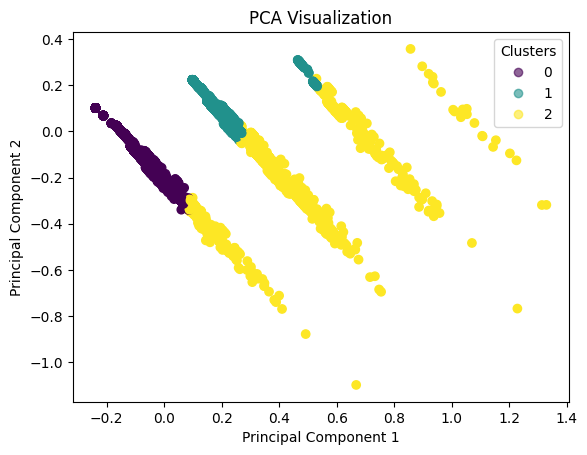

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data1 = pca.fit_transform(metrics_scaled1)
pca_metrics1 = pd.DataFrame(pca_data1, columns=['PC1', 'PC2'])
pca_metrics1['cluster'] = cluster1
sct = plt.scatter(pca_metrics1['PC1'], pca_metrics1['PC2'],
            c=pca_metrics1['cluster'],cmap='viridis')
handles, labels = sct.legend_elements(prop="colors", alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.legend(handles, labels, title="Clusters")
plt.show()

In [160]:
# print descriptive stats for each group
clusters_k3_1 = np.unique(cluster1)
for grp in clusters_k3_1:
  metrics0[metrics0.cluster1==grp]
  print(f""" For Group {grp}:
  {metrics0[metrics0.cluster1==grp].describe()}. """)

 For Group 0: 
         receipt_unique  week_cnt_one_receipt  recent_four_active_weeks  \
count    11227.000000          11227.000000                   11227.0   
mean         1.200766              0.962768                       0.0   
std          0.446643              0.516297                       0.0   
min          1.000000              0.000000                       0.0   
25%          1.000000              1.000000                       0.0   
50%          1.000000              1.000000                       0.0   
75%          1.000000              1.000000                       0.0   
max          5.000000              3.000000                       0.0   

       quantity_sum      sale_sum  brand_repeated  brand_unique  cluster1  \
count  11227.000000  11227.000000    11227.000000  11227.000000   11227.0   
mean       1.096236      4.543616        0.002850      0.537276       0.0   
std        2.709191      5.371576        0.053314      0.572326       0.0   
min        0.0000

In [165]:
# user elbow method to determine the best k
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

rs = 50
s_scores = {}
c_scores = {}
for k in np.arange(2, 15):
  kmeansk = KMeans(n_clusters=k, random_state=rs)
  clusterk = kmeansk.fit_predict(metrics_scaled1)
  s_scores[k] = silhouette_score(metrics_scaled1, clusterk)
  c_scores[k] = calinski_harabasz_score(metrics_scaled1, clusterk)

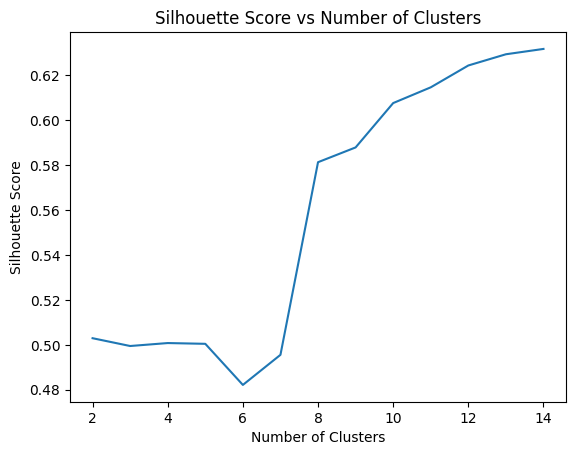

In [166]:
# plot the silhouette score
plt.plot(s_scores.keys(), s_scores.values())
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()
# choose k=6.

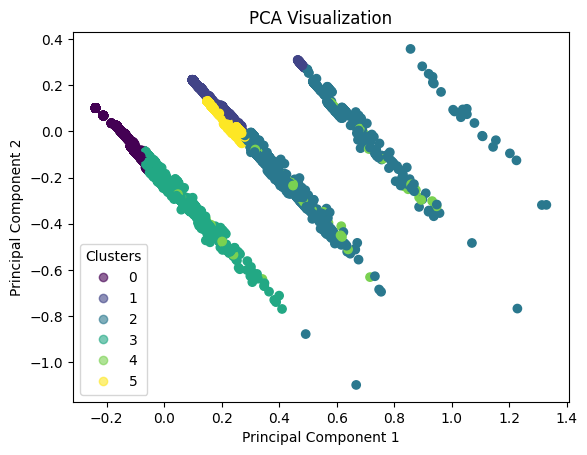

In [173]:
# run kmeans for k=6 based on elbow method
k = 6
kmeans3 = KMeans(n_clusters=k, random_state=50)
cluster3 = kmeans3.fit_predict(metrics_scaled1)
metrics0 = metrics.copy()
metrics0['cluster3'] = cluster3

pca = PCA(n_components=2)
pca_data1 = pca.fit_transform(metrics_scaled1)
pca_metrics1 = pd.DataFrame(pca_data1, columns=['PC1', 'PC2'])
pca_metrics1['cluster3'] = cluster3
sct = plt.scatter(pca_metrics1['PC1'], pca_metrics1['PC2'],
            c=pca_metrics1['cluster3'],cmap='viridis')
handles, labels = sct.legend_elements(prop="colors", alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.legend(handles, labels, title="Clusters")
plt.show()

In [176]:
# analyze the groups
drive.mount('/content/drive', force_remount=True)
kmeans3_smry = metrics0.groupby('cluster3').describe()
kmeans3_smry.to_csv('/content/drive/My Drive/data/kmeans3_smry.csv')

Mounted at /content/drive


<a name='leadingbrand'></a>
Section 2-4. Dips and Salsa Leading Brand <br>
Pre-analysis <br>
Query <br>
<br>
[Back to Table of Contents](#contenttable) <br>
[Back to Analytics and Queries](#questionquery) <br>


In [ ]:
# review the products table
products1_copy = products1.copy()
products1_copy['category_1'] = products1_copy['category_1'].astype(str)
products1_copy['category_2'] = products1_copy['category_2'].astype(str)
products1_copy['category_3'] = products1_copy['category_3'].astype(str)
products1_copy['category_4'] = products1_copy['category_4'].astype(str)
# show different variants of dips and salsa.
cats = ['category_1', 'category_2', 'category_3', 'category_4']
products1_copy[products1_copy.category_2.str.contains(
    'dips', case=False, na=False)][cats].drop_duplicates()

,category_1,category_2,category_3,category_4
207,Snacks,Dips & Salsa,Hummus,nan
246,Snacks,Dips & Salsa,Ranch Dip,nan
690,Snacks,Dips & Salsa,Dip Mixes,nan
733,Snacks,Dips & Salsa,Salsa,nan
893,Snacks,Dips & Salsa,Other Dips,nan
1374,Snacks,Dips & Salsa,Guacamole,nan
2976,Snacks,Dips & Salsa,French Onion Dip,nan
3040,Snacks,Dips & Salsa,Cheese Dip,nan
3352,Snacks,Dips & Salsa,Bean Dip,nan
454436,Snacks,Dips & Salsa,nan,nan


In [ ]:
tp.columns

Index(['receipt_id', 'purchase_date', 'scan_date', 'store_name', 'user_id',
       'barcode', 'final_quantity', 'final_sale', 'category_1', 'category_2',
       'category_3', 'category_4', 'manufacturer', 'brand'],
      dtype='object')

In [ ]:
# summarize the brands under dips & salsa category
tp = pd.merge(transaction2, products1, how='inner', on='barcode')
tp_ds = tp[tp.category_2.str.contains('dips', case=False, na=False)]
# summarize the brands with transactions
tp_ds_cnt = val_cnt_col(tp_ds, ['brand'])
tp_ds_cnt.head()

,brand,count,pct
0,TOSTITOS,36,11.08%
1,PACE,24,7.38%
2,NaN,21,6.46%
3,FRITOS,19,5.85%
4,DEAN'S DAIRY DIP,17,5.23%


In [ ]:
22/tq

0.06489675516224189

In [ ]:
# select the proper subset to join
tsub = transaction2[
    ~(transaction2.barcode.isna()) & (transaction2.final_quantity>0) &
    (transaction2.final_sale>0)]
p_ds = products1[
    (products1.category_2.str.contains('dips', case=False, na=False))&
    ~(products1.brand.isna())]
# join the tables
tp_ds1 = pd.merge(tsub, p_ds, how='inner', on='barcode')
tq, ts = tp_ds1.final_quantity.sum(), tp_ds1.final_sale.sum()
# calculate the total quantity and sales for each brand
tp_ds1_brand_smry = tp_ds1.groupby(by='brand', dropna=False).agg(
    total_quantity=('final_quantity', 'sum'),
    quantity_share=('final_quantity', lambda x: x.sum()/tq.round(2)),
    total_sale=('final_sale', 'sum'),
    sale_share=('final_sale', lambda x: x.sum()/ts.round(2)),
    unique_user=('user_id', 'nunique'),
    repeated_user=('user_id', lambda x: x.value_counts().gt(1).sum() ),
    unique_store=('store_name', 'nunique')
    ).reset_index()
tp_ds1_brand_smry['quantity_share_rank'] = tp_ds1_brand_smry[
    'quantity_share'].rank(method='min', ascending=False).astype(int)
tp_ds1_brand_smry['sale_share_rank'] = tp_ds1_brand_smry[
    'sale_share'].rank(method='min', ascending=False).astype(int)
tp_ds1_brand_smry['unique_user_rank'] = tp_ds1_brand_smry[
    'unique_user'].rank(method='min', ascending=False).astype(int)
tp_ds1_brand_smry['repeated_users_rank'] = tp_ds1_brand_smry[
    'repeated_user'].rank(method='min', ascending=False).astype(int)
tp_ds1_brand_smry['store_rank'] = tp_ds1_brand_smry[
    'unique_store'].rank(method='min', ascending=False).astype(int)
tp_ds1_brand_smry['quantity_share'] = (
    100*tp_ds1_brand_smry['quantity_share']).round(2).astype(str).add('%')
tp_ds1_brand_smry['sale_share'] = (
    100*tp_ds1_brand_smry['sale_share']).round(2).astype(str).add('%')
tp_ds1_brand_smry.sort_values(
    by='total_sale', ascending=False, inplace=True)
tp_ds1_brand_smry.head()

,brand,total_quantity,quantity_share,total_sale,sale_share,unique_user,repeated_user,unique_store,quantity_share_rank,sale_share_rank,unique_user_rank,repeated_users_rank,store_rank
53,TOSTITOS,38.0,11.99%,181.30,14.24%,35,1,16,1,1,1,1,1
17,GOOD FOODS,9.0,2.84%,94.91,7.45%,9,0,4,11,2,10,2,7
45,PACE,24.0,7.57%,85.75,6.73%,24,0,8,2,3,2,2,3
15,FRITOS,20.0,6.31%,67.16,5.27%,19,0,9,3,4,3,2,2
32,MARKETSIDE,16.0,5.05%,65.22,5.12%,16,0,1,5,5,5,2,21


In [ ]:
# get the weekly growth of variously brands
tp_ds1['scan_week'] = tp_ds1['scan_date'].dt.isocalendar().week
# get the unique values of brands and scan weeks.
tp_brand_list = tp_ds1.brand.unique()
tp_sweek_list = tp_ds1.scan_week.unique()
# get the combinations of brand and scan weeks
brand_week_comb = list(itertools.product(tp_brand_list, tp_sweek_list))
brand_week_comb_df = pd.DataFrame(brand_week_comb,
                                  columns=['brand', 'scan_week'])
# summarize the sales and quantity by brands each week
tp_ds_brand_wk = tp_ds1.groupby(
    by=['brand', 'scan_week'], dropna=False).agg(
    total_quantity=('final_quantity', 'sum'),
    total_sale=('final_sale', 'sum')).reset_index()
# combine the full iteration list with the actual quantity/sales
tp_ds_brand_wk = pd.merge(
    tp_ds_brand_wk, brand_week_comb_df, how='right',
    on=['brand', 'scan_week'])
tp_ds_brand_wk['total_quantity'] = tp_ds_brand_wk.total_quantity.fillna(0)
tp_ds_brand_wk['total_sale'] = tp_ds_brand_wk.total_sale.fillna(0)
tp_ds_brand_wk.sort_values(by=['brand', 'scan_week'], inplace=True)
tp_ds_brand_wk.reset_index(inplace=True, drop=True)
tp_ds_brand_wk1 = tp_ds_brand_wk.groupby(by='brand', dropna=False).agg(
    qmedian=('total_quantity', 'median'),
    qiqrange=('total_quantity', lambda x: x.quantile(0.75)-x.quantile(0.25)),
    ).reset_index()
tp_ds_brand_wk1['qmed_rank'] = tp_ds_brand_wk1[
    'qmedian'].rank(method='min', ascending=False).astype(int)
tp_ds_brand_wk1['qiqr_rank'] = tp_ds_brand_wk1[
    'qiqrange'].rank(method='min', ascending=False).astype(int)
# join with the previous table
tp_ds_brand_smry1 = pd.merge(
    tp_ds_brand_wk1, tp_ds1_brand_smry, how='inner', on='brand')
tp_ds_brand_smry1['mean_rank'] = tp_ds_brand_smry1[[
    'quantity_share_rank', 'sale_share_rank', 'unique_user_rank',
    'store_rank', 'qmed_rank', 'qiqr_rank', 'repeated_users_rank'
    ]].mean(axis=1).round(1).astype(int)
tp_ds_brand_smry1.sort_values(
    by='mean_rank', inplace=True, ascending=True)
tp_ds_brand_smry1.head(10)

,brand,qmedian,qiqrange,qmed_rank,qiqr_rank,total_quantity,quantity_share,total_sale,sale_share,unique_user,repeated_user,unique_store,quantity_share_rank,sale_share_rank,unique_user_rank,repeated_users_rank,store_rank,mean_rank
53,TOSTITOS,3.0,2.0,1,2,38.0,11.99%,181.30,14.24%,35,1,16,1,1,1,1,1,1
45,PACE,2.0,3.0,2,1,24.0,7.57%,85.75,6.73%,24,0,8,2,3,2,2,3,2
15,FRITOS,1.0,1.0,3,8,20.0,6.31%,67.16,5.27%,19,0,9,3,4,3,2,2,3
8,DEAN'S DAIRY DIP,1.0,2.0,3,2,17.0,5.36%,39.95,3.14%,17,0,4,4,9,4,2,7,4
20,HELUVA GOOD!,1.0,2.0,3,2,15.0,4.73%,53.98,4.24%,15,0,3,7,6,6,2,10,5
33,MARZETTI,1.0,1.0,3,8,11.0,3.47%,51.14,4.02%,11,0,7,9,7,8,2,4,5
32,MARKETSIDE,1.0,2.0,3,2,16.0,5.05%,65.22,5.12%,16,0,1,5,5,5,2,21,6
17,GOOD FOODS,0.0,1.0,13,8,9.0,2.84%,94.91,7.45%,9,0,4,11,2,10,2,7,7
22,HIDDEN VALLEY,1.0,2.0,3,2,16.0,5.05%,31.26,2.45%,10,0,2,5,13,9,2,16,7
13,FRESHNESS GUARANTEED,1.0,2.0,3,2,12.0,3.79%,46.66,3.66%,12,0,1,8,8,7,2,21,7


In [ ]:
  # sql query to obtain the result
query41 = """
/* select the proper subset to join */
WITH CTE1 AS (
  SELECT P.*, T.*
  FROM (SELECT * FROM products1
  WHERE CATEGORY_2 IS NOT NULL AND CATEGORY_2 LIKE '%dips%') P
  JOIN (SELECT * FROM transaction2
  WHERE BARCODE IS NOT NULL AND FINAL_QUANTITY>0
  AND FINAL_SALE>0) T
  ON P.BARCODE=T.BARCODE
),
/* calculate the total quantity and sales for each brand */
CTE2 AS (
  SELECT BRAND, SUM(FINAL_QUANTITY) AS TOTAL_QUANTITY,
  SUM(FINAL_SALE) AS TOTAL_SALE, COUNT(DISTINCT USER_ID) AS UNIQUE_USER,
  COUNT(DISTINCT STORE_NAME) AS UNIQUE_STORE
  FROM CTE1
  GROUP BY BRAND
),
/* calculate the weekly quantity and assign rn to identify
median and quantile range */
CTE3 AS (
  SELECT C11.BRAND, C11.WEEK_NUM,
    COALESCE(C10.TOTAL_QUANTITY, 0) AS TOTAL_QUANTITY,
    ROW_NUMBER() OVER(PARTITION BY C11.BRAND
    ORDER BY C10.TOTAL_QUANTITY) AS RN
  FROM (
    SELECT B1.BRAND, W1.WEEK_NUM
    FROM (SELECT DISTINCT BRAND FROM CTE1) AS B1 CROSS JOIN
    (SELECT DISTINCT STRFTIME('%W', SCAN_DATE) AS WEEK_NUM
    FROM transaction2) W1 ) C11
  LEFT JOIN(
    SELECT BRAND, STRFTIME('%W', SCAN_DATE) AS WEEK_NUM,
    SUM(FINAL_QUANTITY) AS TOTAL_QUANTITY
    FROM CTE1 GROUP BY BRAND, WEEK_NUM) C10
  ON C10.BRAND=C11.BRAND AND C10.WEEK_NUM=C11.WEEK_NUM
  WHERE C11.BRAND IS NOT NULL
  ORDER BY C11.BRAND, C11.WEEK_NUM
), CTE_MEDIAN AS (
  SELECT BRAND, TOTAL_QUANTITY AS Q_MEDIAN
  FROM CTE3 WHERE RN=7
), CTE_Q25 AS (
  SELECT BRAND, AVG(TOTAL_QUANTITY) AS Q_PERC25
  FROM CTE3 WHERE RN=3 OR RN=4 GROUP BY BRAND
), CTE_Q75 AS (
  SELECT BRAND, AVG(TOTAL_QUANTITY) AS Q_PERC75
  FROM CTE3 WHERE RN=10 OR RN=11 GROUP BY BRAND
), CTE_USERPURCHASE AS (
  SELECT BRAND, USER_ID, COUNT(*) AS USER_PURCHASE
  FROM CTE1 GROUP BY BRAND, USER_ID
)
SELECT BRAND,
ROUND((TOTAL_SALE_RANK + TOTAL_QUANTITY_RANK + UNIQUE_USER_RANK +
UNIQUE_STORE_RANK + Q_MEDIAN_RANK + Q_RANGE_RANK +
REPEATED_USERS_RANK)/7,0) AS AVG_RANK
FROM (
SELECT C1.BRAND, C1.TOTAL_SALE, C1.TOTAL_QUANTITY, C1.UNIQUE_USER,
C1.UNIQUE_STORE, C1.Q_MEDIAN, C1.Q_PERC75-C1.Q_PERC25 AS Q_RANGE,
C1.REPEATED_USERS,
/* calculate the rank for each metric */
RANK() OVER (ORDER BY TOTAL_SALE DESC) AS TOTAL_SALE_RANK,
RANK() OVER (ORDER BY TOTAL_QUANTITY DESC) AS TOTAL_QUANTITY_RANK,
RANK() OVER (ORDER BY UNIQUE_USER DESC) AS UNIQUE_USER_RANK,
RANK() OVER (ORDER BY UNIQUE_STORE DESC) AS UNIQUE_STORE_RANK,
RANK() OVER (ORDER BY Q_MEDIAN DESC) AS Q_MEDIAN_RANK,
RANK() OVER (ORDER BY Q_PERC75-C1.Q_PERC25 DESC) AS Q_RANGE_RANK,
RANK() OVER (ORDER BY REPEATED_USERS DESC) AS REPEATED_USERS_RANK
FROM (
SELECT CTE2.*, CTE_MEDIAN.Q_MEDIAN,
CTE_Q25.Q_PERC25, CTE_Q75.Q_PERC75,
COALESCE(C4.REPEATED_USERS, 0) AS REPEATED_USERS
FROM CTE2 JOIN CTE_MEDIAN ON CTE2.BRAND=CTE_MEDIAN.BRAND
JOIN CTE_Q25 ON CTE2.BRAND=CTE_Q25.BRAND
JOIN CTE_Q75 ON CTE2.BRAND=CTE_Q75.BRAND
LEFT JOIN (SELECT BRAND, COUNT(USER_ID) AS REPEATED_USERS
FROM CTE_USERPURCHASE WHERE USER_PURCHASE>1 GROUP BY BRAND) C4
ON CTE2.BRAND=C4.BRAND ) C1
)
ORDER BY AVG_RANK ASC
LIMIT 1
"""
result41 = sqldf(query41, globals())
print(result41)

      BRAND  AVG_RANK
0  TOSTITOS       1.0


<a name='yoygrowth'></a>
Section 2-5 Fetch YOY Growth <br>
<br>
[Back to Table of Contents](#contenttable) <br>
[Back to Analytics and Queries](#questionquery)

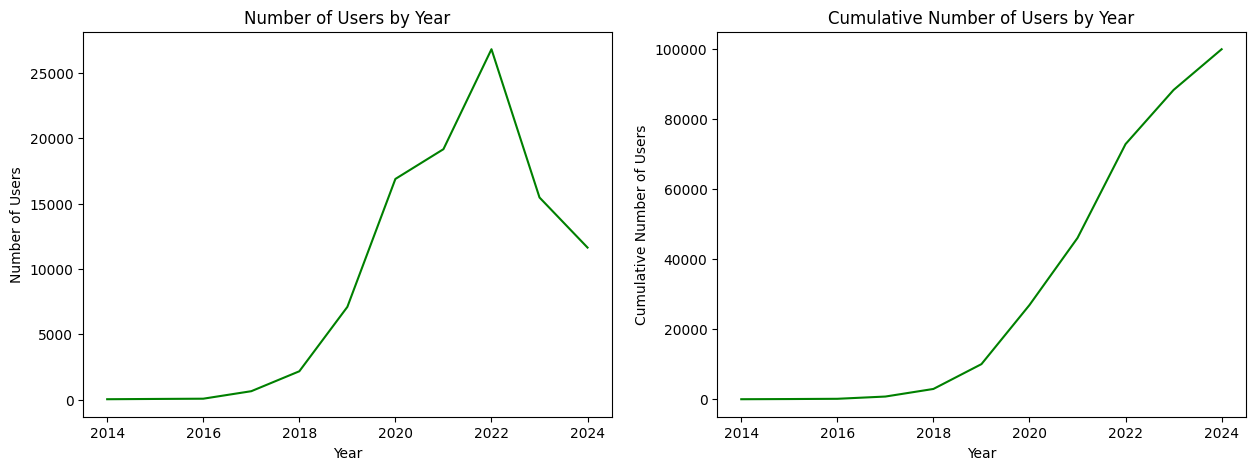

In [ ]:
# calculate the cumulative user volume
user_yoy = user1.copy()
# convert the datetime value to year and quarter
user_yoy['created_year'] = user_yoy['created_date'].dt.year
user_yoy['created_quarter'] = user_yoy['created_date'].dt.to_period('Q')
# summarize the number of users created at each year and cumulatives
user_yly_cnt = user_yoy.groupby(by='created_year', dropna=False).agg(
    user_cnt=('id', 'nunique')).reset_index()
user_yly_cnt['user_cumulative'] = \
user_yly_cnt.user_cnt.cumsum()
# visualize the finding.
fg, ax1 = plt.subplots(1, 2, figsize=(15, 5))
ax1[0].plot(user_yly_cnt['created_year'],
            user_yly_cnt['user_cnt'], color='g')
ax1[0].set_xlabel('Year')
ax1[0].set_ylabel('Number of Users')
ax1[0].set_title('Number of Users by Year')
ax1[1].plot(user_yly_cnt['created_year'],
            user_yly_cnt['user_cumulative'], color='g')
ax1[1].set_xlabel('Year')
ax1[1].set_ylabel('Cumulative Number of Users')
ax1[1].set_title('Cumulative Number of Users by Year')
plt.show()

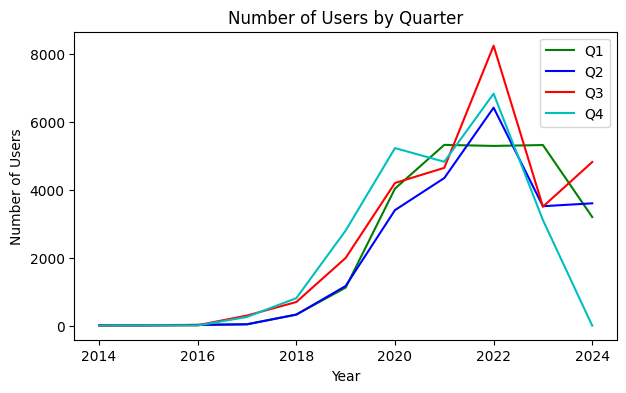

In [ ]:
# the number of user growth per quarter
user_yoy['created_quarter_dtls'] = user_yoy['created_date'].dt.quarter
# analyze the quarters by each year
ga = user_yoy.groupby(by=['created_year', 'created_quarter_dtls'],
                      dropna=False).agg(
    user_cnt=('id', 'nunique')).reset_index()
pt = pd.pivot(ga, values='user_cnt', index=['created_year'],
              columns=['created_quarter_dtls']).reset_index()
pt.columns = ['year', 'Q1', 'Q2', 'Q3', 'Q4']
pt.fillna(0, inplace=True)
pt.set_index('year', inplace=True)
# visualize the quarterly user creation
fg, ax1 = plt.subplots(figsize=(7, 4))
ax1.plot(pt.index, pt['Q1'], color='g', label='Q1')
ax1.plot(pt.index, pt['Q2'], color='b', label='Q2')
ax1.plot(pt.index, pt['Q3'], color='r', label='Q3')
ax1.plot(pt.index, pt['Q4'], color='c', label='Q4')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Users')
ax1.set_title('Number of Users by Quarter')
ax1.legend()
plt.show()

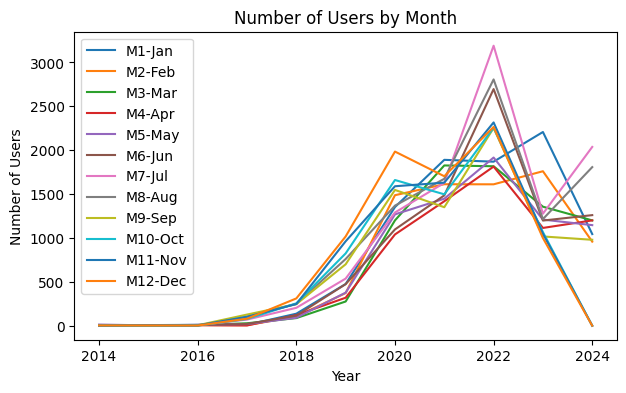

In [ ]:
# set the monthly growth
user_yoy['created_month_dtls'] = user_yoy['created_date'].dt.month
# group by creation month
user_mlm_cnt = user_yoy.groupby(by=['created_year', 'created_month_dtls'],
    dropna=False).agg(user_cnt=('id', 'nunique')).reset_index()
# summarize the pivot table
pt1 = pd.pivot(user_mlm_cnt, values='user_cnt', index=['created_year'],
               columns=['created_month_dtls']).reset_index()
pt1.columns = ['year', 'M1-Jan', 'M2-Feb', 'M3-Mar', 'M4-Apr', 'M5-May',
               'M6-Jun', 'M7-Jul', 'M8-Aug', 'M9-Sep',
               'M10-Oct', 'M11-Nov', 'M12-Dec']
pt1.fillna(0, inplace=True)
pt1.set_index('year', inplace=True)
# visualize the quarterly user creation
fg, ax1 = plt.subplots(figsize=(7, 4))
pt1_months = pt1.columns.to_list()
for col in pt1.columns:
  ax1.plot(pt1.index, pt1[col], label=col)
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Users')
ax1.set_title('Number of Users by Month')
plt.show()

In [ ]:
# analyze the user retention
t_retention_users = transaction2.groupby(by='user_id', dropna=False).agg(
    receipt_unique=('receipt_id', 'nunique')).reset_index()
# obtain the list of users with activity
user_retention = pd.merge(user1, t_retention_users, how='left',
                          left_on='id', right_on='user_id')
user_retention['created_year'] = user_retention['created_date'].dt.year
user_retention['created_month'] = user_retention['created_date'].dt.month

In [ ]:
# create the summary table
vol = val_cnt_col(user_retention, ['created_year'])
ret = user_retention[user_retention.receipt_unique>0]
ret_vol = val_cnt_col(ret, ['created_year'])
ret_smry = pd.merge(vol, ret_vol, how='left', on=['created_year'],
                    suffixes=['', '_retention'])
ret_smry.drop(columns=['pct_retention'], inplace=True)
ret_smry.fillna(0, inplace=True)
ret_smry['pct_retention'] = ret_smry.count_retention/ret_smry['count']
ret_smry['pct_retention'] = (
    100*ret_smry['pct_retention']).round(2).astype(str).add('%')
ret_smry.sort_values(by='created_year')

,created_year,count,pct,count_retention,pct_retention
10,2014,30,0.03%,0.0,0.0%
9,2015,51,0.05%,0.0,0.0%
8,2016,70,0.07%,0.0,0.0%
7,2017,644,0.64%,2.0,0.31%
6,2018,2168,2.17%,2.0,0.09%
5,2019,7093,7.09%,7.0,0.1%
2,2020,16883,16.88%,16.0,0.09%
1,2021,19159,19.16%,9.0,0.05%
0,2022,26807,26.81%,23.0,0.09%
3,2023,15464,15.46%,20.0,0.13%


In [ ]:
# create the transaction table
transaction3 = transaction2.copy()
transaction3 = transaction3[
    ~(transaction3.barcode.isna()) &
    (transaction3.final_quantity>0) & (transaction3.final_sale>0)]
# get the user and sale information
user_sale = pd.merge(user1, transaction3, how='left',
                     left_on='id', right_on='user_id')
user_sale['created_year'] = user_sale['created_date'].dt.year
# summarize the sale
user_sale_smry = user_sale.groupby(by='created_year', dropna=False).agg(
    user_cnt=('id', 'nunique'),
    total_sale=('final_sale', 'sum')).reset_index()
user_sale_smry

,created_year,user_cnt,total_sale
0,2014,30,0.00
1,2015,51,0.00
2,2016,70,0.00
3,2017,644,1.99
4,2018,2168,16.12
5,2019,7093,45.79
6,2020,16883,104.19
7,2021,19159,40.82
8,2022,26807,116.53
9,2023,15464,165.06


In [ ]:
query25 = """
WITH CTE_YEAR1 AS (
  /* create annual user count and cumulative user count */
  SELECT STRFTIME('%Y', CREATED_DATE) AS YEAR,
  COUNT(ID) AS USER_CNT,
  SUM(COUNT(ID)) OVER (ORDER BY STRFTIME('%Y', CREATED_DATE)) AS CUM_USER_CNT
  FROM user1 GROUP BY YEAR
), CTE_QUARTER1 AS (
  /* create summary on year and quarter level */
  SELECT STRFTIME('%Y', CREATED_DATE) AS YEAR,
  CASE WHEN STRFTIME('%m', CREATED_DATE) BETWEEN '01' AND '03' THEN 'Q1'
  WHEN STRFTIME('%m', CREATED_DATE) BETWEEN '04' AND '06' THEN 'Q2'
  WHEN STRFTIME('%m', CREATED_DATE) BETWEEN '07' AND '09' THEN 'Q3'
  WHEN STRFTIME('%m', CREATED_DATE) BETWEEN '10' AND '12' THEN 'Q4'
  END AS QUARTER,
  COUNT(ID) AS USER_CNT
  FROM user1 GROUP BY YEAR, QUARTER
)
/* calculate the yoy percentage growth for each quarter */
SELECT Y.YEAR, USER_CNT, CUM_USER_CNT, Q1, Q2, Q3, Q4,
ROUND(100*(Q1-LAG(Q1) OVER(ORDER BY Q3.YEAR))/(
  LAG(Q1) OVER(ORDER BY Q3.YEAR)),2) AS YOY_Q1_INC_PCT,
ROUND(100*(Q2-LAG(Q2) OVER(ORDER BY Q3.YEAR))/(
  LAG(Q2) OVER(ORDER BY Q3.YEAR)),2) AS YOY_Q2_INC_PCT,
ROUND(100*(Q3-LAG(Q3) OVER(ORDER BY Q3.YEAR))/(
  LAG(Q3) OVER(ORDER BY Q3.YEAR)),2) AS YOY_Q3_INC_PCT,
ROUND(100*(Q4-LAG(Q4) OVER(ORDER BY Q3.YEAR))/(
  LAG(Q4) OVER(ORDER BY Q3.YEAR)),2) AS YOY_Q4_INC_PCT
FROM CTE_YEAR1 AS Y
JOIN (
  /* put each year's quarter data into one row */
  SELECT YEAR,
  SUM(CASE WHEN QUARTER='Q1' THEN CUM_USER_CNT ELSE 0 END) AS Q1,
  SUM(CASE WHEN QUARTER='Q2' THEN CUM_USER_CNT ELSE 0 END) AS Q2,
  SUM(CASE WHEN QUARTER='Q3' THEN CUM_USER_CNT ELSE 0 END) AS Q3,
  SUM(CASE WHEN QUARTER='Q4' THEN CUM_USER_CNT ELSE 0 END) AS Q4
  FROM (SELECT *,
  SUM(USER_CNT) OVER(ORDER BY YEAR, QUARTER) AS CUM_USER_CNT
  FROM CTE_QUARTER1) Q2 GROUP BY YEAR
) Q3
ON Y.YEAR=Q3.YEAR
"""
result25 = sqldf(query25, globals())
pd.DataFrame(result25)

,YEAR,USER_CNT,CUM_USER_CNT,Q1,Q2,Q3,Q4,YOY_Q1_INC_PCT,YOY_Q2_INC_PCT,YOY_Q3_INC_PCT,YOY_Q4_INC_PCT
0,2014,30,30,0,15,24,30,NaN,NaN,NaN,NaN
1,2015,51,81,48,58,69,81,NaN,286.0,187.0,170.0
2,2016,70,151,106,130,145,151,120.0,124.0,110.0,86.0
3,2017,644,795,195,236,536,795,83.0,81.0,269.0,426.0
4,2018,2168,2963,1124,1451,2150,2963,476.0,514.0,301.0,272.0
5,2019,7093,10056,4086,5256,7253,10056,263.0,262.0,237.0,239.0
6,2020,16883,26939,14095,17501,21706,26939,244.0,232.0,199.0,167.0
7,2021,19159,46098,32267,36617,41268,46098,128.0,109.0,90.0,71.0
8,2022,26807,72905,51395,57820,66069,72905,59.0,57.0,60.0,58.0
9,2023,15464,88369,78228,81749,85257,88369,52.0,41.0,29.0,21.0
